# Análisis de Intervenciones de Seguridad Vial en Autopistas Urbanas de Ciudad de Buenos Aires 🛣 🚗

## Contexto

En la Ciudad de Buenos Aires a diario se registran accidentes de tránsito, en algunos casos con víctimas fatales.

El presente análisis se basa principalmente en la información proporcionada por Seguridad Vial del gobierno de la Ciudad de Buenos Aires: [Seguridad Vial Autopistas AUSA](https://data.buenosaires.gob.ar/dataset/seguridad-vial-autopistas-ausa)

Además consultaremos datos a Nivel Nacional relativos a Tasa de Mortalidad en diferentes provincias. Para ello utilizaremos la API del gobierno nacional disponible en [datos.gob.ar](https://datos.gob.ar/dataset/jgm_3/archivo/jgm_3.13).

---

El motivo de este análisis es poder obtener factores determinantes que permitan entender mejor bajo qué condiciones se producen la mayor cantidad de accidentes.

Esto permitirá poder tomar acciones preventivas a fin de disminuir las posibilidades que se produzcan los mismos, o en el caso que se produzcan poder actuar más rápidamente en el auxilio.

Por ejemplo, se podría reforzar los controles en determinados días y horarios,  se podrían agregar más detectores de velocidad en tramos problemáticos, disponer de servicios de emergencias más cercanos a las zonas con más siniestros, etc.

---

**Nota:** Todas las observaciones se basan en los datos al día de la fecha, los mismos son actualizados a diario, por lo que algunas estimaciones podrían variar levemente respecto al momento en que se efectuó el análisis.

## Audiencia 📣

Este análisis persigue como objetivo prevenir, o al menos disminuir, lesiones y fallecimientos en accidentes de tránsito. 

Por lo que en primer lugar, está destinado a los sectores encargados de la Seguridad Vial de Autopistas AUSA y Secretaría de Transporte de la Ciudad de Buenos Aires, ya que son estas áreas las que pueden implementar acciones correctivas a fines de minimizar los mismos.

En segundo lugar, está destinado a la sociedad en general y toda aquella persona interesada en conocer más sobre la problemática.

Y por último a cualquier persona interesada en adentrarse en el mundo de la Ciencia de Datos 😉

## Preguntas de interés 💭

Intentaremos resolver las siguientes preguntas:

**Preguntas principales**

- ¿Cuáles son las autopistas con mayor cantidad de accidentes?
- ¿Cuál es la cantidad de heridos / muertos por autopista?
- ¿Se observa algún tipo de tendencia en cuanto a la cantidad de siniestros?
- ¿Las condiciones meteorológicas y condiciones de la superficie de la vía influyen en la cantidad de accidentes?
- ¿Existen días y horarios en los que se producen mayor cantidad de accidentes?
- ¿Existen meses en los que se producen mayor cantidad de accidentes?

**Preguntas secundarias**
- Comparativamente a nivel nacional ¿Se cuenta con una baja o alta Tasa de Mortalidad?


## 1. Intervenciones de Seguridad Vial 🚸

### 1.1 Data Acquisition - Lectura csv 📁

El dataset [intervenciones-de-seguridad-vial.csv](https://data.buenosaires.gob.ar/dataset/seguridad-vial-autopistas-au) cuenta con información diaria de las intervenciones efectuadas en autopistas de la Ciudad.

Debajo podemos observar una muestra de esta información 👇

(*) En este momento se cuenta con registros desde el 01/01/2014 hasta 31/03/2022

In [307]:
import pandas as pd
import numpy as np

# Importar dataset con las intervenciones de seguridad vial
URL_INTERVENCIONES_SEGURIDAD_VIAL = 'https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ausa/seguridad-vial-autopistas-ausa/intervenciones-de-seguridad-vial.csv'
df_intervenciones = pd.read_csv(URL_INTERVENCIONES_SEGURIDAD_VIAL, on_bad_lines='skip', sep=';')

In [308]:
df_intervenciones.shape

(7579, 15)

In [309]:
df_intervenciones.head(3).append(df_intervenciones.tail(3))

,fecha,hora,autopista,banda_y_o_ramal,pk,condiciones_meteorologicas,superficie_de_la_via,lesionados,fallecidos,tipo_de_siniestro,moto,liviano,bus,camion,Unnamed: 14
0,2014-01-01,1,AU CAMPORA,ASCENDENTE,600,BUENO,SECA,1,0,COLISION CON OBSTACULO FIJO,0,1,0,0,NaN
1,2014-01-01,3,AU DELLEPIANE,DESCENDENTE,600,BUENO,SECA,0,0,COLISION CON OBSTACULO FIJO,0,1,0,0,NaN
2,2014-01-01,22,AU 25 DE MAYO,ASCENDENTE,5900,BUENO,SECA,8,0,COLISION CON DOS O MAS VEHICULOS,0,2,0,0,NaN
7576,31/03/2022,8,AU 25 DE MAYO,ASCENDENTE,6600,BUENO,SECA,1,0,COLISION CON DOS O MAS VEHICULOS,1,2,0,1,2022.0
7577,31/03/2022,13,AU FRONDIZI,ASCENDENTE,1900,BUENO,SECA,0,0,COLISION CON DOS O MAS VEHICULOS,0,1,1,0,2022.0
7578,31/03/2022,17,AV. CANTILO,ASCENDENTE,9700,BUENO,SECA,0,1,COLISION CON DOS O MAS VEHICULOS,1,0,0,1,2022.0


### 1.2 Análisis Exploratorio de Datos (EDA) 🔎

Comenzaremos con un análisis preliminar de la información como: Tipos de datos, duplicados, cantidad de nulos, etc.

(Las modificaciones las realizaremos en la siguiente sección Data Wrangling)

In [310]:
df_intervenciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7579 entries, 0 to 7578
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   fecha                       7579 non-null   object 
 1   hora                        7579 non-null   int64  
 2   autopista                   7579 non-null   object 
 3   banda_y_o_ramal             7579 non-null   object 
 4   pk                          7579 non-null   object 
 5   condiciones_meteorologicas  7579 non-null   object 
 6   superficie_de_la_via        7579 non-null   object 
 7   lesionados                  7579 non-null   object 
 8   fallecidos                  7579 non-null   int64  
 9   tipo_de_siniestro           7579 non-null   object 
 10  moto                        7579 non-null   object 
 11  liviano                     7579 non-null   int64  
 12  bus                         7579 non-null   int64  
 13  camion                      7579 

#### 1.2.1 Tipos de datos

De acuerdo a lo observado ☝ será necesario realizar modificaciones en los tipos de datos de:
- Columna `fecha`: Debería ser `datetime`
- Columna `lesionados`: Debería ser numérico (`int64`)
- Columna `moto`: Debería ser numérico (`int64`)


#### 1.2.2 Duplicados

Veamos qué contiene la columna `autopista`

In [311]:
df_intervenciones['autopista'].unique()

array(['AU CAMPORA', 'AU DELLEPIANE', 'AU 25 DE MAYO', 'AU PERTIO MORENO',
       'AV LUGONES', 'AV CANTILO', 'AU FRONDIZI', 'AU ILLIA',
       'AV. LUGONES', 'AU PERITO MORENO', 'DIST. 9 DE JULIO',
       'AV. CANTILO', 'TRANSICION RAMAL 2', 'DIST. UDAONDO',
       'TRANSICION RAMAL 3', 'PTE. SCALABRINI ORTIZ',
       'TRANSICION RAMAL 1', 'PASEO DEL BAJO', 'DIST. DELLEPIANE',
       'TRANSICION RAMAL 4'], dtype=object)

Observamos los siguientes duplicados:

- 'AV CANTILO' = 'AV. CANTILO', 
- 'AU PERTIO MORENO' = 'AU PERITO MORENO', 
- 'AV LUGONES' = 'AV. LUGONES'

Hagamos lo mismo con la columna `tipo_de_siniestro`

In [312]:
df_intervenciones['tipo_de_siniestro'].unique()

array(['COLISION CON OBSTACULO FIJO', 'COLISION CON DOS O MAS VEHICULOS',
       'OBSTACULO NO FIJO',
       'SINIESTRO DE UN SOLO VEHICULO / SIN COLISION',
       'OTRO TIPO DE SINIESTRO', '0', 'OTRO',
       'CON DOS O MAS VEHICULOS-IMPACTO TRASERO'], dtype=object)

Observamos un solo duplicado:

- 'OTRO TIPO DE SINIESTRO' = 'OTRO'

#### 1.2.3 Nulos

Ahora veremos qué porcentaje de nulos tiene cada columna

In [313]:
df_intervenciones.isnull().sum() / df_intervenciones.shape[0] * 100

fecha                          0.000000
hora                           0.000000
autopista                      0.000000
banda_y_o_ramal                0.000000
pk                             0.000000
condiciones_meteorologicas     0.000000
superficie_de_la_via           0.000000
lesionados                     0.000000
fallecidos                     0.000000
tipo_de_siniestro              0.000000
moto                           0.000000
liviano                        0.000000
bus                            0.000000
camion                         0.000000
Unnamed: 14                   98.957646
dtype: float64

In [314]:
df_intervenciones.iloc[:,14].unique()

array([  nan, 2022.])

La columna 'Unnamed' (14) no tiene datos relevantes y en su mayoría son nulos (98%) por lo que se puede eliminar

### 1.3 Data Wrangling 🛠️

#### 1.3.1 Entradas con datos inválidos

En la columna `lesionados` no todos los datos son numéricos, por lo tanto previo a la conversión debemos tratar estos registros.

Esto se debe a datos ingresados con ';' en la columna `condiciones_meteorologicas`, lo cual provoca un desplazamiento de las siguientes columnas 👇

In [315]:
df_intervenciones[-df_intervenciones['lesionados'].str.isnumeric()]

,fecha,hora,autopista,banda_y_o_ramal,pk,condiciones_meteorologicas,superficie_de_la_via,lesionados,fallecidos,tipo_de_siniestro,moto,liviano,bus,camion,Unnamed: 14
402,2014-05-27,6,AU PERTIO MORENO,TRANSICION RAMAL 2,RAMAL ENLACE,"""NIEBLA","BRUMA O HUMO""",MOJADA/HUMEDA,0,0,COLISION CON OBSTACULO FIJO,0,1,0,NaN
529,2014-06-30,8,AU PERTIO MORENO,DESCENDENTE,5400,"""NIEBLA","BRUMA O HUMO""",MOJADA/HUMEDA,0,0,COLISION CON DOS O MAS VEHICULOS,0,0,0,NaN
558,2014-09-07,5,AU 25 DE MAYO,DESCENDENTE,7000,"""NIEBLA","BRUMA O HUMO""",MOJADA/HUMEDA,1,0,SINIESTRO DE UN SOLO VEHICULO / SIN COLISION,1,0,0,NaN
3047,2016-08-30,6,AU 25 DE MAYO,ASCENDENTE,1500,"""NIEBLA","BRUMA O HUMO""",MOJADA/HUMEDA,0,0,COLISION CON DOS O MAS VEHICULOS,1,1,0,NaN
3487,2017-09-01,4,AU DELLEPIANE,DESCENDENTE,300,"""NIEBLA","BRUMA O HUMO""",SECA,0,0,COLISION CON DOS O MAS VEHICULOS,0,2,0,NaN
4005,2017-07-15,6,AU 25 DE MAYO,DESCENDENTE,500,"""NIEBLA","BRUMA O HUMO""",SECA,3,0,COLISION CON DOS O MAS VEHICULOS,0,2,0,NaN
4053,2017-02-08,8,AU 25 DE MAYO,ASCENDENTE,7100,"""NIEBLA","BRUMA O HUMO""",SECA,0,0,COLISION CON DOS O MAS VEHICULOS,0,2,0,NaN
5847,2019-05-27,7,AU PERITO MORENO,ASCENDENTE,4000,"""NIEBLA","BRUMA O HUMO""",MOJADA/HUMEDA,0,0,COLISION CON DOS O MAS VEHICULOS,0,2,0,NaN
5968,2019-07-13,7,AU 25 DE MAYO,ASCENDENTE,2100,"""NIEBLA","BRUMA O HUMO""",MOJADA/HUMEDA,1,0,COLISION CON DOS O MAS VEHICULOS,2,0,0,NaN


Identificaremos las filas con datos inválidos en columna `lesionados` para su tratamiento

In [316]:
invalid_lesionados_index = df_intervenciones[-df_intervenciones['lesionados'].str.isnumeric()].index
invalid_lesionados_index

Int64Index([402, 529, 558, 3047, 3487, 4005, 4053, 5847, 5968], dtype='int64')

Unimos las columnas `condiciones_metereologicas` y `superficie_de_la_via` en una sóla

In [317]:
temp_condiciones = df_intervenciones.loc[invalid_lesionados_index, ['condiciones_meteorologicas', 'superficie_de_la_via']].apply(','.join, axis=1)
temp_condiciones = temp_condiciones.str.replace('"','')
temp_condiciones

402     NIEBLA, BRUMA O HUMO
529     NIEBLA, BRUMA O HUMO
558     NIEBLA, BRUMA O HUMO
3047    NIEBLA, BRUMA O HUMO
3487    NIEBLA, BRUMA O HUMO
4005    NIEBLA, BRUMA O HUMO
4053    NIEBLA, BRUMA O HUMO
5847    NIEBLA, BRUMA O HUMO
5968    NIEBLA, BRUMA O HUMO
dtype: object

Asignamos la serie temporal recién creada a la columna `condiciones_metereologicas`

In [318]:
df_intervenciones.loc[invalid_lesionados_index, 'condiciones_meteorologicas'] = temp_condiciones
df_intervenciones.loc[invalid_lesionados_index]

,fecha,hora,autopista,banda_y_o_ramal,pk,condiciones_meteorologicas,superficie_de_la_via,lesionados,fallecidos,tipo_de_siniestro,moto,liviano,bus,camion,Unnamed: 14
402,2014-05-27,6,AU PERTIO MORENO,TRANSICION RAMAL 2,RAMAL ENLACE,"NIEBLA, BRUMA O HUMO","BRUMA O HUMO""",MOJADA/HUMEDA,0,0,COLISION CON OBSTACULO FIJO,0,1,0,NaN
529,2014-06-30,8,AU PERTIO MORENO,DESCENDENTE,5400,"NIEBLA, BRUMA O HUMO","BRUMA O HUMO""",MOJADA/HUMEDA,0,0,COLISION CON DOS O MAS VEHICULOS,0,0,0,NaN
558,2014-09-07,5,AU 25 DE MAYO,DESCENDENTE,7000,"NIEBLA, BRUMA O HUMO","BRUMA O HUMO""",MOJADA/HUMEDA,1,0,SINIESTRO DE UN SOLO VEHICULO / SIN COLISION,1,0,0,NaN
3047,2016-08-30,6,AU 25 DE MAYO,ASCENDENTE,1500,"NIEBLA, BRUMA O HUMO","BRUMA O HUMO""",MOJADA/HUMEDA,0,0,COLISION CON DOS O MAS VEHICULOS,1,1,0,NaN
3487,2017-09-01,4,AU DELLEPIANE,DESCENDENTE,300,"NIEBLA, BRUMA O HUMO","BRUMA O HUMO""",SECA,0,0,COLISION CON DOS O MAS VEHICULOS,0,2,0,NaN
4005,2017-07-15,6,AU 25 DE MAYO,DESCENDENTE,500,"NIEBLA, BRUMA O HUMO","BRUMA O HUMO""",SECA,3,0,COLISION CON DOS O MAS VEHICULOS,0,2,0,NaN
4053,2017-02-08,8,AU 25 DE MAYO,ASCENDENTE,7100,"NIEBLA, BRUMA O HUMO","BRUMA O HUMO""",SECA,0,0,COLISION CON DOS O MAS VEHICULOS,0,2,0,NaN
5847,2019-05-27,7,AU PERITO MORENO,ASCENDENTE,4000,"NIEBLA, BRUMA O HUMO","BRUMA O HUMO""",MOJADA/HUMEDA,0,0,COLISION CON DOS O MAS VEHICULOS,0,2,0,NaN
5968,2019-07-13,7,AU 25 DE MAYO,ASCENDENTE,2100,"NIEBLA, BRUMA O HUMO","BRUMA O HUMO""",MOJADA/HUMEDA,1,0,COLISION CON DOS O MAS VEHICULOS,2,0,0,NaN


Si bien observamos que ahora la columna `condiciones_meteorologicas` quedó correctamente, el resto de columnas necesitan un desplazamiento hacia la izquierda

In [319]:
df_intervenciones.loc[invalid_lesionados_index, 'superficie_de_la_via'] = df_intervenciones.loc[invalid_lesionados_index, 'lesionados']
df_intervenciones.loc[invalid_lesionados_index, 'lesionados'] = df_intervenciones.loc[invalid_lesionados_index, 'fallecidos']
df_intervenciones.loc[invalid_lesionados_index, 'fallecidos'] = df_intervenciones.loc[invalid_lesionados_index, 'tipo_de_siniestro']
df_intervenciones.loc[invalid_lesionados_index, 'tipo_de_siniestro'] = df_intervenciones.loc[invalid_lesionados_index, 'moto']
df_intervenciones.loc[invalid_lesionados_index, 'moto'] = df_intervenciones.loc[invalid_lesionados_index, 'liviano']
df_intervenciones.loc[invalid_lesionados_index, 'liviano'] = df_intervenciones.loc[invalid_lesionados_index, 'bus']
df_intervenciones.loc[invalid_lesionados_index, 'bus'] = df_intervenciones.loc[invalid_lesionados_index, 'camion']
df_intervenciones.loc[invalid_lesionados_index, 'camion'] = df_intervenciones.loc[invalid_lesionados_index, df_intervenciones.columns[14]]
df_intervenciones.loc[invalid_lesionados_index]

,fecha,hora,autopista,banda_y_o_ramal,pk,condiciones_meteorologicas,superficie_de_la_via,lesionados,fallecidos,tipo_de_siniestro,moto,liviano,bus,camion,Unnamed: 14
402,2014-05-27,6,AU PERTIO MORENO,TRANSICION RAMAL 2,RAMAL ENLACE,"NIEBLA, BRUMA O HUMO",MOJADA/HUMEDA,0,0,COLISION CON OBSTACULO FIJO,0,1,0,NaN,NaN
529,2014-06-30,8,AU PERTIO MORENO,DESCENDENTE,5400,"NIEBLA, BRUMA O HUMO",MOJADA/HUMEDA,0,0,COLISION CON DOS O MAS VEHICULOS,0,0,0,NaN,NaN
558,2014-09-07,5,AU 25 DE MAYO,DESCENDENTE,7000,"NIEBLA, BRUMA O HUMO",MOJADA/HUMEDA,1,0,SINIESTRO DE UN SOLO VEHICULO / SIN COLISION,1,0,0,NaN,NaN
3047,2016-08-30,6,AU 25 DE MAYO,ASCENDENTE,1500,"NIEBLA, BRUMA O HUMO",MOJADA/HUMEDA,0,0,COLISION CON DOS O MAS VEHICULOS,1,1,0,NaN,NaN
3487,2017-09-01,4,AU DELLEPIANE,DESCENDENTE,300,"NIEBLA, BRUMA O HUMO",SECA,0,0,COLISION CON DOS O MAS VEHICULOS,0,2,0,NaN,NaN
4005,2017-07-15,6,AU 25 DE MAYO,DESCENDENTE,500,"NIEBLA, BRUMA O HUMO",SECA,3,0,COLISION CON DOS O MAS VEHICULOS,0,2,0,NaN,NaN
4053,2017-02-08,8,AU 25 DE MAYO,ASCENDENTE,7100,"NIEBLA, BRUMA O HUMO",SECA,0,0,COLISION CON DOS O MAS VEHICULOS,0,2,0,NaN,NaN
5847,2019-05-27,7,AU PERITO MORENO,ASCENDENTE,4000,"NIEBLA, BRUMA O HUMO",MOJADA/HUMEDA,0,0,COLISION CON DOS O MAS VEHICULOS,0,2,0,NaN,NaN
5968,2019-07-13,7,AU 25 DE MAYO,ASCENDENTE,2100,"NIEBLA, BRUMA O HUMO",MOJADA/HUMEDA,1,0,COLISION CON DOS O MAS VEHICULOS,2,0,0,NaN,NaN


Ahora estas entradas se ven mucho mejor 😀, sin embargo no contamos con datos para la columna `camion`.

Debido a que para que haya un accidente se requiere al menos un vehículo, podemos concluir que será al menos 1 cuando `moto`, `liviano` y `bus` = 0.

En el resto de casos podemos asumir que `camion` = 0. Al ser pocos registros no afectará demasiado en el análisis

In [320]:
df_intervenciones.loc[(df_intervenciones['moto']==0) & (df_intervenciones['liviano']==0) & (df_intervenciones['bus']==0), 'camion'] = 1

df_intervenciones['camion'].fillna(0, inplace=True)
df_intervenciones.loc[invalid_lesionados_index]

,fecha,hora,autopista,banda_y_o_ramal,pk,condiciones_meteorologicas,superficie_de_la_via,lesionados,fallecidos,tipo_de_siniestro,moto,liviano,bus,camion,Unnamed: 14
402,2014-05-27,6,AU PERTIO MORENO,TRANSICION RAMAL 2,RAMAL ENLACE,"NIEBLA, BRUMA O HUMO",MOJADA/HUMEDA,0,0,COLISION CON OBSTACULO FIJO,0,1,0,0.0,NaN
529,2014-06-30,8,AU PERTIO MORENO,DESCENDENTE,5400,"NIEBLA, BRUMA O HUMO",MOJADA/HUMEDA,0,0,COLISION CON DOS O MAS VEHICULOS,0,0,0,1.0,NaN
558,2014-09-07,5,AU 25 DE MAYO,DESCENDENTE,7000,"NIEBLA, BRUMA O HUMO",MOJADA/HUMEDA,1,0,SINIESTRO DE UN SOLO VEHICULO / SIN COLISION,1,0,0,0.0,NaN
3047,2016-08-30,6,AU 25 DE MAYO,ASCENDENTE,1500,"NIEBLA, BRUMA O HUMO",MOJADA/HUMEDA,0,0,COLISION CON DOS O MAS VEHICULOS,1,1,0,0.0,NaN
3487,2017-09-01,4,AU DELLEPIANE,DESCENDENTE,300,"NIEBLA, BRUMA O HUMO",SECA,0,0,COLISION CON DOS O MAS VEHICULOS,0,2,0,0.0,NaN
4005,2017-07-15,6,AU 25 DE MAYO,DESCENDENTE,500,"NIEBLA, BRUMA O HUMO",SECA,3,0,COLISION CON DOS O MAS VEHICULOS,0,2,0,0.0,NaN
4053,2017-02-08,8,AU 25 DE MAYO,ASCENDENTE,7100,"NIEBLA, BRUMA O HUMO",SECA,0,0,COLISION CON DOS O MAS VEHICULOS,0,2,0,0.0,NaN
5847,2019-05-27,7,AU PERITO MORENO,ASCENDENTE,4000,"NIEBLA, BRUMA O HUMO",MOJADA/HUMEDA,0,0,COLISION CON DOS O MAS VEHICULOS,0,2,0,0.0,NaN
5968,2019-07-13,7,AU 25 DE MAYO,ASCENDENTE,2100,"NIEBLA, BRUMA O HUMO",MOJADA/HUMEDA,1,0,COLISION CON DOS O MAS VEHICULOS,2,0,0,0.0,NaN


Ahora que la información se ven mucho mejor podemos proceder a la conversión de Tipos de Dato 👇

#### 1.3.2 Convertir tipos de dato

Hechemos un nuevo vistazo a como quedaron los tipo de datos luego de las últimas modificaciones

In [321]:
df_intervenciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7579 entries, 0 to 7578
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   fecha                       7579 non-null   object 
 1   hora                        7579 non-null   int64  
 2   autopista                   7579 non-null   object 
 3   banda_y_o_ramal             7579 non-null   object 
 4   pk                          7579 non-null   object 
 5   condiciones_meteorologicas  7579 non-null   object 
 6   superficie_de_la_via        7579 non-null   object 
 7   lesionados                  7579 non-null   object 
 8   fallecidos                  7579 non-null   object 
 9   tipo_de_siniestro           7579 non-null   object 
 10  moto                        7579 non-null   object 
 11  liviano                     7579 non-null   int64  
 12  bus                         7579 non-null   int64  
 13  camion                      7579 

Convertiremos todos los tipo de datos en un solo paso

In [322]:
df_intervenciones['fecha'] = pd.to_datetime(df_intervenciones['fecha'])
df_intervenciones['lesionados'] = df_intervenciones['lesionados'].astype('int')
df_intervenciones['fallecidos'] = df_intervenciones['fallecidos'].astype('int')
df_intervenciones['moto'] = df_intervenciones['moto'].astype('int')
df_intervenciones['camion'] = df_intervenciones['camion'].astype('int')
df_intervenciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7579 entries, 0 to 7578
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   fecha                       7579 non-null   datetime64[ns]
 1   hora                        7579 non-null   int64         
 2   autopista                   7579 non-null   object        
 3   banda_y_o_ramal             7579 non-null   object        
 4   pk                          7579 non-null   object        
 5   condiciones_meteorologicas  7579 non-null   object        
 6   superficie_de_la_via        7579 non-null   object        
 7   lesionados                  7579 non-null   int64         
 8   fallecidos                  7579 non-null   int64         
 9   tipo_de_siniestro           7579 non-null   object        
 10  moto                        7579 non-null   int64         
 11  liviano                     7579 non-null   int64       

#### 1.3.3 Eliminar columna 'Unnamed'

Veamos qué información tiene la última columna `Unnamed`

In [323]:
df_intervenciones.iloc[:,14].unique()

array([  nan, 2022.])

Observamos que no tiene ningún dato relevante, por lo que podemos eliminarla sin ningún inconveniente

In [324]:
df_intervenciones.drop(df_intervenciones.columns[14],axis = 1, inplace=True)
df_intervenciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7579 entries, 0 to 7578
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   fecha                       7579 non-null   datetime64[ns]
 1   hora                        7579 non-null   int64         
 2   autopista                   7579 non-null   object        
 3   banda_y_o_ramal             7579 non-null   object        
 4   pk                          7579 non-null   object        
 5   condiciones_meteorologicas  7579 non-null   object        
 6   superficie_de_la_via        7579 non-null   object        
 7   lesionados                  7579 non-null   int64         
 8   fallecidos                  7579 non-null   int64         
 9   tipo_de_siniestro           7579 non-null   object        
 10  moto                        7579 non-null   int64         
 11  liviano                     7579 non-null   int64       

#### 1.3.4 Unificar duplicados

##### Columna `autopista`

En la sección anterior ya habíamos visto que teníamos duplicados para la columna `autopista`: 
- 'AV CANTILO' = 'AV. CANTILO', 
- 'AU PERTIO MORENO' = 'AU PERITO MORENO', 
- 'AV LUGONES' = 'AV. LUGONES'

Ahora veremos qué cantidad aporta cada duplicado para luego unificarlos.

In [325]:
df_intervenciones['autopista'].value_counts()

AU 25 DE MAYO            2264
AU DELLEPIANE            1284
AU PERTIO MORENO         1003
AU FRONDIZI               735
AU ILLIA                  444
AV LUGONES                441
AU PERITO MORENO          440
AV. LUGONES               283
AV CANTILO                269
AV. CANTILO               168
AU CAMPORA                 92
DIST. 9 DE JULIO           37
TRANSICION RAMAL 3         34
PASEO DEL BAJO             33
TRANSICION RAMAL 2         25
PTE. SCALABRINI ORTIZ      11
TRANSICION RAMAL 1          6
DIST. UDAONDO               4
DIST. DELLEPIANE            4
TRANSICION RAMAL 4          2
Name: autopista, dtype: int64

Procedamos a unificarlos 👷

In [326]:
df_intervenciones['autopista'] = df_intervenciones['autopista'].replace('AV. CANTILO', 'AV CANTILO')
df_intervenciones['autopista'] = df_intervenciones['autopista'].replace('AU PERTIO MORENO', 'AU PERITO MORENO')
df_intervenciones['autopista'] = df_intervenciones['autopista'].replace('AV. LUGONES', 'AV LUGONES')
df_intervenciones['autopista'].value_counts()

AU 25 DE MAYO            2264
AU PERITO MORENO         1443
AU DELLEPIANE            1284
AU FRONDIZI               735
AV LUGONES                724
AU ILLIA                  444
AV CANTILO                437
AU CAMPORA                 92
DIST. 9 DE JULIO           37
TRANSICION RAMAL 3         34
PASEO DEL BAJO             33
TRANSICION RAMAL 2         25
PTE. SCALABRINI ORTIZ      11
TRANSICION RAMAL 1          6
DIST. UDAONDO               4
DIST. DELLEPIANE            4
TRANSICION RAMAL 4          2
Name: autopista, dtype: int64

##### Columna `tipo_de_siniestro`

Ya habíamos visto que tenemos duplicados en la columna `tipo_de_siniestro`
- 'OTRO' = 'OTRO TIPO DE SINIESTRO'

Ahora procederemos a unificarlos

In [327]:
df_intervenciones['tipo_de_siniestro'].value_counts()

COLISION CON DOS O MAS VEHICULOS                4730
COLISION CON OBSTACULO FIJO                     1536
SINIESTRO DE UN SOLO VEHICULO / SIN COLISION     851
OBSTACULO NO FIJO                                406
OTRO                                              32
OTRO TIPO DE SINIESTRO                            23
CON DOS O MAS VEHICULOS-IMPACTO TRASERO            1
Name: tipo_de_siniestro, dtype: int64

In [328]:
# Se observan valores duplicados correspondientes al mismo tipo de siniestro
# OTRO TIPO DE SINIESTRO = OTRO, 1 = OTRO TIPO DE SINIESTRO
df_intervenciones['tipo_de_siniestro'] = df_intervenciones['tipo_de_siniestro'].replace('OTRO TIPO DE SINIESTRO', 'OTRO')
df_intervenciones['tipo_de_siniestro'].value_counts()

COLISION CON DOS O MAS VEHICULOS                4730
COLISION CON OBSTACULO FIJO                     1536
SINIESTRO DE UN SOLO VEHICULO / SIN COLISION     851
OBSTACULO NO FIJO                                406
OTRO                                              55
CON DOS O MAS VEHICULOS-IMPACTO TRASERO            1
Name: tipo_de_siniestro, dtype: int64

### 1.4 Visualizaciones 📊

Vamos a realizar algunas visualizaciones que nos permitan obtener los primeros datos relevantes de acuerdo a las preguntas de interés

In [329]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Accidentes por autopista

Veamos qué autopistas son las que cuentan con mayor cantidad de accidentes

In [330]:
df_intervenciones['tipo_de_siniestro'].value_counts()

COLISION CON DOS O MAS VEHICULOS                4730
COLISION CON OBSTACULO FIJO                     1536
SINIESTRO DE UN SOLO VEHICULO / SIN COLISION     851
OBSTACULO NO FIJO                                406
OTRO                                              55
CON DOS O MAS VEHICULOS-IMPACTO TRASERO            1
Name: tipo_de_siniestro, dtype: int64

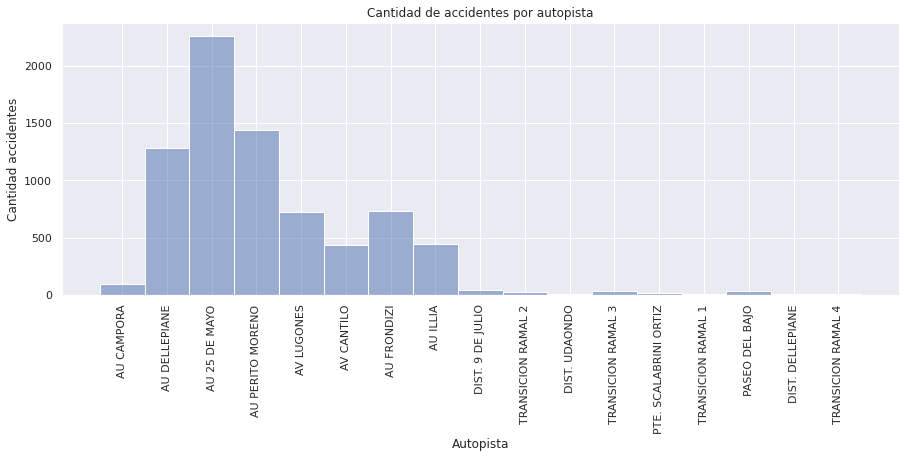

In [331]:
sns.set(rc={'figure.figsize':(15,5)})
histplot1 = sns.histplot(data=df_intervenciones, x="autopista", alpha=0.5)
histplot1.set_title('Cantidad de accidentes por autopista')
histplot1.set_ylabel('Cantidad accidentes')
histplot1.set_xlabel('Autopista')
plt.xticks(rotation=90)
plt.show()

Observaciones: 
- Sin duda la Autopista 25 de Mayo es la que acumula mayor cantidad de accidentes, seguida con cantidades similares por Autopista Perito Moreno y Autopista Dellepiane.
- Necesitamos alguna forma de relativizar estos datos, ya que la cantidad de accidentes dependerá mucho de la longitud de la autopista (una autopista más larga tendrá mayor cantidad de accidentes). Lo veremos en la siguiente sección 😉

#### Accidentes por km por autopista

Para darle más contexto al análisis anterior 👆 necesitamos conocer la longitud de cada autopista.

Para ello utilizaremos un csv de recopilación propia que contiene extensión en kilómetros y velocidades máximas permitidas.

---


Fuentes:
- [Ausa mapa autopistas.pdf](https://www.ausa.com.ar/documentos/ausa-mapa-autopistas.pdf)
- [Límites de velocidad](https://www.buenosaires.gob.ar/desarrollourbano/transporte/autopistas-urbanas/seguridad-vial/limites-y-control#:~:text=L%C3%ADmites%20de%20velocidad,-Para%20viajar%20de&text=M%C3%A1xima%20para%20autos%20%2D%2080%20km,)
- [Wikipedia](https://es.wikipedia.org/wiki/Wikipedia:Portada)

In [332]:
URL_AUTOPISTAS = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRJmzGcxzcFYf468LX17i800Hgk_Z7qgvQDDTZk5JOo89uvE6EXMCRxY_PHRSezA7fNfOvBgetILdEw/pub?output=csv'
autopistas = pd.read_csv(URL_AUTOPISTAS)
autopistas.set_index('autopista', inplace=True)
autopistas['extension_km'].replace(',','.',regex=True, inplace=True)
autopistas['extension_km'] = autopistas['extension_km'].astype(float)
autopistas.sort_values('extension_km', ascending=False, inplace=True)
autopistas

,extension_km,velocidad_max_livianos,velocidad_max_pesados
autopista,,,
AU 25 DE MAYO,10.0,80,60
AV LUGONES,6.2,100,60
AU PERITO MORENO,6.0,100,60
AU DELLEPIANE,4.2,100,60
AU CAMPORA,3.6,100,60
AU FRONDIZI,3.5,100,60
AV CANTILO,3.5,100,60
AU ILLIA,3.5,80,60


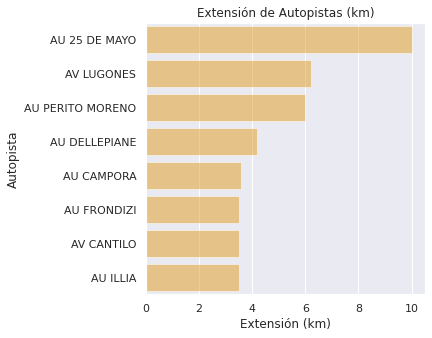

In [333]:
sns.set(rc={'figure.figsize':(5,5)})
barplot1 = sns.barplot(x=autopistas['extension_km'], y=autopistas.index, alpha=0.5, color='orange')
barplot1.set_title('Extensión de Autopistas (km)')
barplot1.set_ylabel('Autopista')
barplot1.set_xlabel('Extensión (km)')
plt.show()

Agrupemos las intervenciones por autopista.

No nos interesan intervenciones pertenencientes a ramales y distribuidoras ya que son relativamente pequeñas y no aportan información al análisis.

In [334]:
intervenciones_por_autopista = pd.DataFrame(df_intervenciones.groupby('autopista').size())
intervenciones_por_autopista.columns = ['cant_intervenciones']
# Solo nos quedaremos con Autopistas, removeremos entradas pertenecientes a ramales y distribuidoras
intervenciones_por_autopista.drop(intervenciones_por_autopista[~intervenciones_por_autopista.index.isin(autopistas.index)].index, inplace = True)
intervenciones_por_autopista

,cant_intervenciones
autopista,
AU 25 DE MAYO,2264
AU CAMPORA,92
AU DELLEPIANE,1284
AU FRONDIZI,735
AU ILLIA,444
AU PERITO MORENO,1443
AV CANTILO,437
AV LUGONES,724


Uniremos las intervenciones con la información adicional por autopista (extensión y velocidades máximas)

In [335]:
intervenciones_por_autopista_join = pd.concat([intervenciones_por_autopista, autopistas], axis=1, join='inner')
intervenciones_por_autopista_join

,cant_intervenciones,extension_km,velocidad_max_livianos,velocidad_max_pesados
autopista,,,,
AU 25 DE MAYO,2264,10.0,80,60
AU CAMPORA,92,3.6,100,60
AU DELLEPIANE,1284,4.2,100,60
AU FRONDIZI,735,3.5,100,60
AU ILLIA,444,3.5,80,60
AU PERITO MORENO,1443,6.0,100,60
AV CANTILO,437,3.5,100,60
AV LUGONES,724,6.2,100,60


Finalmente podemos calcular las **Intervenciones por km** para cada autopista como:


$ intervenciones por km = \dfrac{cant intervenciones}{extension km}  $

In [336]:
intervenciones_por_autopista_join['intervenciones_por_km'] = intervenciones_por_autopista_join['cant_intervenciones'] / intervenciones_por_autopista_join['extension_km']
intervenciones_por_autopista_join.sort_values('intervenciones_por_km', ascending=False, inplace=True)
intervenciones_por_autopista_join

,cant_intervenciones,extension_km,velocidad_max_livianos,velocidad_max_pesados,intervenciones_por_km
autopista,,,,,
AU DELLEPIANE,1284,4.2,100,60,305.714286
AU PERITO MORENO,1443,6.0,100,60,240.500000
AU 25 DE MAYO,2264,10.0,80,60,226.400000
AU FRONDIZI,735,3.5,100,60,210.000000
AU ILLIA,444,3.5,80,60,126.857143
AV CANTILO,437,3.5,100,60,124.857143
AV LUGONES,724,6.2,100,60,116.774194
AU CAMPORA,92,3.6,100,60,25.555556


Grafiquemos todo lo anterior

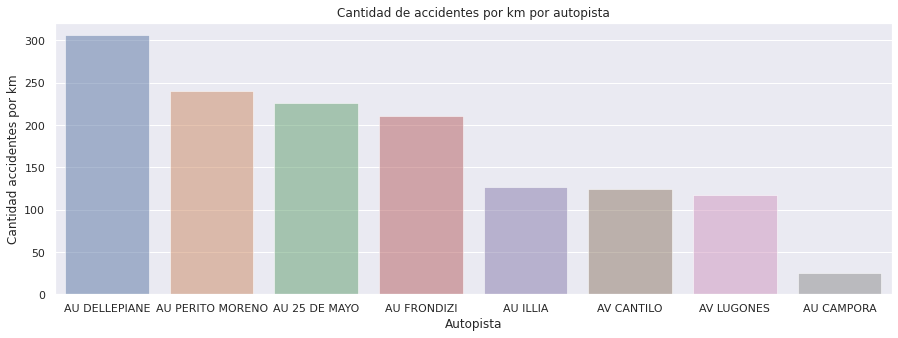

In [337]:
sns.set(rc={'figure.figsize':(15,5)})
barplot1 = sns.barplot(x=intervenciones_por_autopista_join.index, y=intervenciones_por_autopista_join['intervenciones_por_km'], alpha=0.5)
barplot1.set_title('Cantidad de accidentes por km por autopista')
barplot1.set_ylabel('Cantidad accidentes por km')
barplot1.set_xlabel('Autopista')
plt.show()

Observaciones:
- La autopista Dellepiane es la que presenta mayor cantidad de accidentes por km
- Las autopistas Perito Moreno, 25 de Mayo y Frondizi la siguen con cantidades muy similares

#### Lesionados / Fallecidos por km por autopista

Ahora que contamos con información extra como la extensión de las autopistas, podemos calcular la cantidad de lesionados y fallecidos por autopista, pero teniendo en cuenta la longitud de las mismas

In [338]:
lesionados_fallecidos_por_autopista = pd.DataFrame(df_intervenciones.groupby('autopista')[['lesionados','fallecidos']].sum())
# Solo nos quedaremos con Autopistas, removeremos entradas pertenecientes a ramales y distribuidoras
lesionados_fallecidos_por_autopista.drop(lesionados_fallecidos_por_autopista[~lesionados_fallecidos_por_autopista.index.isin(autopistas.index)].index, inplace = True)
lesionados_fallecidos_por_autopista

,lesionados,fallecidos
autopista,,
AU 25 DE MAYO,1537,16
AU CAMPORA,56,1
AU DELLEPIANE,740,3
AU FRONDIZI,513,12
AU ILLIA,230,6
AU PERITO MORENO,752,17
AV CANTILO,200,5
AV LUGONES,366,5


Ahora uniremos el DataFrame con el de autopistas y calcularemos **lesionados_por_km** y **fallecidos_por_km**

$ lesionados por km = \dfrac{lesionados}{extension km}  $


$ fallecidos por km = \dfrac{fallecidos}{extension km}  $

In [339]:
lesionados_fallecidos_por_autopista_join = pd.concat([lesionados_fallecidos_por_autopista, autopistas], axis=1, join='inner')
lesionados_fallecidos_por_autopista_join['lesionados_por_km'] = lesionados_fallecidos_por_autopista_join['lesionados'] / lesionados_fallecidos_por_autopista_join['extension_km']
lesionados_fallecidos_por_autopista_join['fallecidos_por_km'] = lesionados_fallecidos_por_autopista_join['fallecidos'] / lesionados_fallecidos_por_autopista_join['extension_km']
lesionados_fallecidos_por_autopista_join

,lesionados,fallecidos,extension_km,velocidad_max_livianos,velocidad_max_pesados,lesionados_por_km,fallecidos_por_km
autopista,,,,,,,
AU 25 DE MAYO,1537,16,10.0,80,60,153.700000,1.600000
AU CAMPORA,56,1,3.6,100,60,15.555556,0.277778
AU DELLEPIANE,740,3,4.2,100,60,176.190476,0.714286
AU FRONDIZI,513,12,3.5,100,60,146.571429,3.428571
AU ILLIA,230,6,3.5,80,60,65.714286,1.714286
AU PERITO MORENO,752,17,6.0,100,60,125.333333,2.833333
AV CANTILO,200,5,3.5,100,60,57.142857,1.428571
AV LUGONES,366,5,6.2,100,60,59.032258,0.806452


Vamos a graficar todo lo anterior

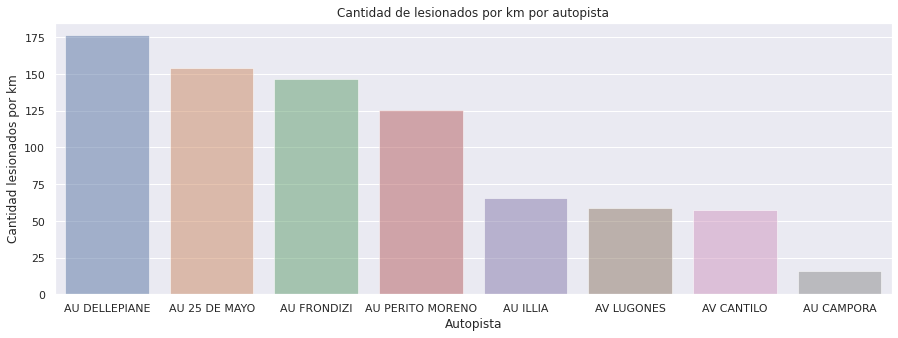

In [340]:
lesionados_fallecidos_por_autopista_join.sort_values('lesionados_por_km', ascending=False, inplace=True)
sns.set(rc={'figure.figsize':(15,5)})
barplot1 = sns.barplot(x=lesionados_fallecidos_por_autopista_join.index, y=lesionados_fallecidos_por_autopista_join['lesionados_por_km'], alpha=0.5)
barplot1.set_title('Cantidad de lesionados por km por autopista')
barplot1.set_ylabel('Cantidad lesionados por km')
barplot1.set_xlabel('Autopista')
plt.show()

Observaciones:
- La autopista Dellepiane cuenta con la mayor cantidad de lesionados por km (esto coincide con la autopista con mayor cantidad de accidentes por km)
- Las autopistas 25 de Mayo, Frondizi y Perito Moreno se ubican en las siguientes posiciones

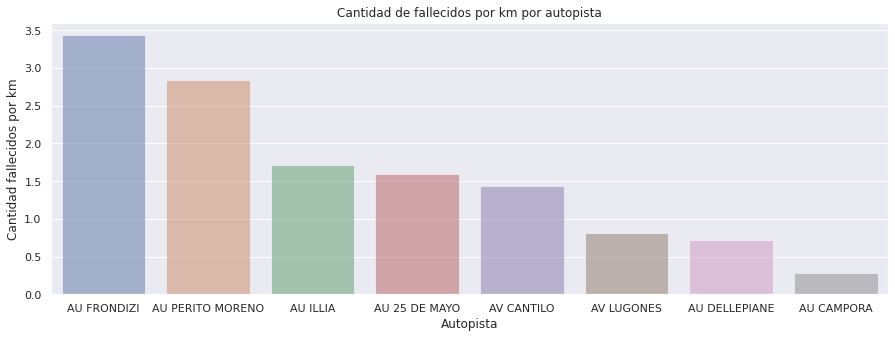

In [341]:
lesionados_fallecidos_por_autopista_join.sort_values('fallecidos_por_km', ascending=False, inplace=True)
sns.set(rc={'figure.figsize':(15,5)})
barplot1 = sns.barplot(x=lesionados_fallecidos_por_autopista_join.index, y=lesionados_fallecidos_por_autopista_join['fallecidos_por_km'], alpha=0.5)
barplot1.set_title('Cantidad de fallecidos por km por autopista')
barplot1.set_ylabel('Cantidad fallecidos por km')
barplot1.set_xlabel('Autopista')
plt.show()

Observaciones:
- La autopista Frondizi es la que cuenta con mayor cantidad de fallecidos por km
- En segundo lugar tenemos Perito Moreno siguiendola con cantidades similares Illia, 25 de Mayo y Cantilo

#### Accidentes por año

Comenzaremos analizando la tendencia en cuanto a la cantidad de accidentes por año.

Debido a que el año 2022 se encuentra incompleto lo quitaremos de este análisis para no crear confunsión en cuanto a la tendencia.

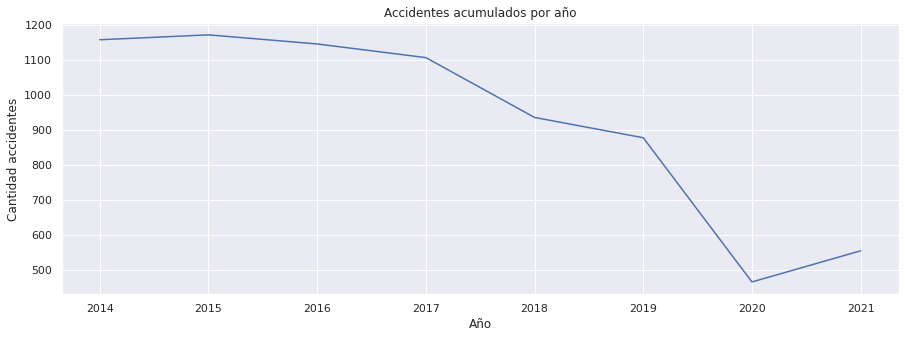

In [342]:
df_intervenciones_por_anio = df_intervenciones[df_intervenciones['fecha'].dt.to_period('Y') != '2022'].groupby(df_intervenciones['fecha'].dt.to_period('Y')).size()
sns.set(rc={"figure.figsize":(15, 5)})
lineplot = sns.lineplot(x=df_intervenciones_por_anio.index.astype(str), y=df_intervenciones_por_anio.values)
lineplot.set_xlabel('Año')                  
lineplot.set_ylabel('Cantidad accidentes')
lineplot.set_title('Accidentes acumulados por año')
plt.show()

Observaciones: 
- Se observa una clara tendencia a la baja en los cantidad de accidentes año a año
- El año 2020 es el que registra menos cantidad de accidentes (teniendo en cuenta que por el momento hay lecturas hasta Marzo 2022). Esto puede deberse a la disminución en el tránsito debido a la cuarentena obligatoria ocasionada por el Covid 19

#### Accidentes por condiciones metereológicas

Veamos como influyen las condiciones metereológicas en los accidentes de tránsito

Text(0, 0.5, 'Cantidad accidentes')

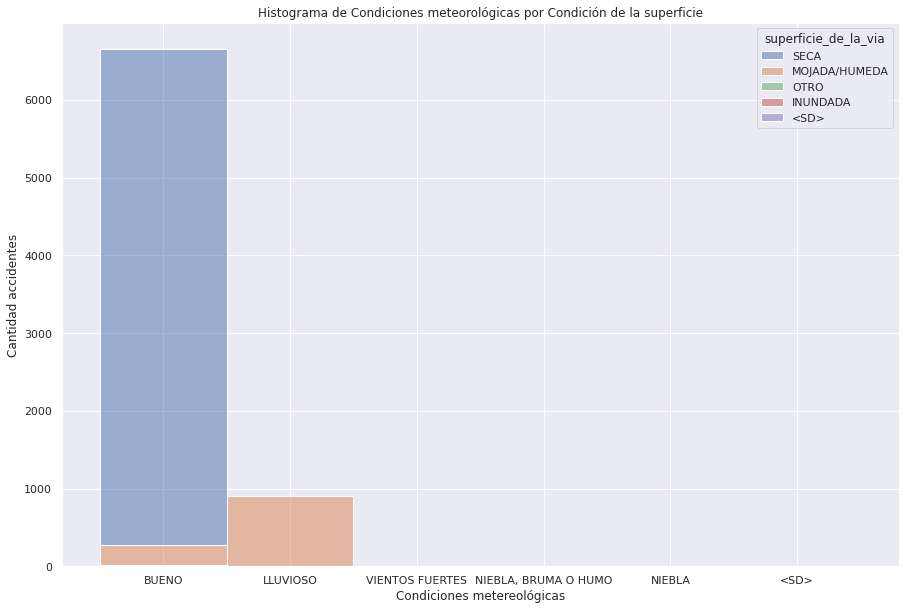

In [343]:
sns.set(rc={'figure.figsize':(15,10)})
histplot2 = sns.histplot(data=df_intervenciones, x="condiciones_meteorologicas", hue="superficie_de_la_via", multiple="stack", alpha=0.5)
histplot2.set_title('Histograma de Condiciones meteorológicas por Condición de la superficie')
histplot2.set_xlabel('Condiciones metereológicas')
histplot2.set_ylabel('Cantidad accidentes')

Del gráfico anterior 👆 ¿Sería correcto afirmar que la mayoría de accidentes se dan en condiciones meteorológicas buenas y con la superficie de la vía seca?

En realidad NO, ya que esto puede deberse a que hay más días buenos que lluviosos por año.

Un análisis más certero debería tener en cuenta la cantidad de días con/sin lluvia 👇

Para poder efectuar este análisis necesitaremos algún tipo de registro de precipitaciones.

Por suerte contamos con un dataset para ello 😀 [registro-precipitaciones-ciudad](https://data.buenosaires.gob.ar/dataset/registro-precipitaciones-ciudad)

(*) En este momento se cuenta con registros desde el Enero 1991 hasta Junio 2020

In [344]:
# Lectura csv registro histórico de precipitaciones
df_precipitaciones = pd.read_csv('https://cdn.buenosaires.gob.ar/datosabiertos/datasets/direccion-general-de-estadisticas-y-censos/registro-precipitaciones-ciudad/historico_precipitaciones.csv')
df_precipitaciones.head(3).append(df_precipitaciones.tail(3))

,año,mes,mm,días
0,1991,Enero,190.0,7
1,1991,Febrero,30.5,6
2,1991,Marzo,55.0,8
351,2020,Abril,87.2,7
352,2020,Mayo,22.6,4
353,2020,Junio,89.2,9


Debido a que nuestro dataset principal solo contamos con datos desde 2014, filtraremos el dataset de precipitaciones desde 2014 al 2019 (2020 no lo tendremos en cuenta por encontrarse incompleto)

Además agruparemos los registros por año

In [345]:
precipitaciones_por_anio = df_precipitaciones.query('año > 2013 and año < 2020').groupby(df_precipitaciones['año'])['días'].sum()
print(precipitaciones_por_anio)

año
2014    128
2015     97
2016    101
2017     98
2018    104
2019     98
Name: días, dtype: int64


Ahora volvamos a nuestro dataset principal de intervenciones

In [346]:
df_intervenciones.head()

,fecha,hora,autopista,banda_y_o_ramal,pk,condiciones_meteorologicas,superficie_de_la_via,lesionados,fallecidos,tipo_de_siniestro,moto,liviano,bus,camion
0,2014-01-01,1,AU CAMPORA,ASCENDENTE,600,BUENO,SECA,1,0,COLISION CON OBSTACULO FIJO,0,1,0,0
1,2014-01-01,3,AU DELLEPIANE,DESCENDENTE,600,BUENO,SECA,0,0,COLISION CON OBSTACULO FIJO,0,1,0,0
2,2014-01-01,22,AU 25 DE MAYO,ASCENDENTE,5900,BUENO,SECA,8,0,COLISION CON DOS O MAS VEHICULOS,0,2,0,0
3,2014-03-01,7,AU CAMPORA,DESCENDENTE,600,BUENO,SECA,0,0,OBSTACULO NO FIJO,0,0,0,1
4,2014-03-01,21,AU PERITO MORENO,DESCENDENTE,5400,BUENO,SECA,1,0,COLISION CON OBSTACULO FIJO,0,2,0,0


Necesitamos saber cuántos accidentes hubo en días lluviosos, agrupados por año (hasta 2019)

In [347]:
intervenciones_diaslluviosos_por_anio = df_intervenciones.query('condiciones_meteorologicas == "LLUVIOSO" and fecha < "2020-01-01"').groupby(df_intervenciones['fecha'].dt.to_period('Y')).size()
intervenciones_diaslluviosos_por_anio.rename_axis('año', inplace=True)
intervenciones_diaslluviosos_por_anio.index=intervenciones_diaslluviosos_por_anio.index.year
intervenciones_diaslluviosos_por_anio

año
2014    174
2015    137
2016    163
2017    137
2018    118
2019     89
dtype: int64

Ahora haremos algo similar para los días buenos

In [348]:
intervenciones_diasbuenos_por_anio = df_intervenciones.query('condiciones_meteorologicas == "BUENO" and fecha < "2020-01-01"').groupby(df_intervenciones['fecha'].dt.to_period('Y')).size()
intervenciones_diasbuenos_por_anio.rename_axis('año', inplace=True)
intervenciones_diasbuenos_por_anio.index=intervenciones_diasbuenos_por_anio.index.year
intervenciones_diasbuenos_por_anio

año
2014     978
2015    1034
2016     981
2017     966
2018     816
2019     784
dtype: int64

Procedamos a unificar todo lo anterior en un solo dataset

In [349]:
df_dias_buenos_lluviosos = pd.DataFrame(
    {
        'dias_lluvia': precipitaciones_por_anio, 
        'dias_buenos': 365 - precipitaciones_por_anio, 
        'cant_accidentes_dias_lluvia': intervenciones_diaslluviosos_por_anio,
        'cant_accidentes_dias_buenos': intervenciones_diasbuenos_por_anio
     },
     index = precipitaciones_por_anio.index)
df_dias_buenos_lluviosos

,dias_lluvia,dias_buenos,cant_accidentes_dias_lluvia,cant_accidentes_dias_buenos
año,,,,
2014,128,237,174,978
2015,97,268,137,1034
2016,101,264,163,981
2017,98,267,137,966
2018,104,261,118,816
2019,98,267,89,784


Realicemos un promedio de cantidad de accidentes por día:
- Accidentes por día lluvioso = Cant. Accidentes en el año con lluvia / Cant. días con lluvia
- Accidentes por día bueno = Cant. Accidentes en el año día bueno / Cant. días buenos

In [350]:
df_dias_buenos_lluviosos['accidentes_por_dia_lluvia'] = df_dias_buenos_lluviosos['cant_accidentes_dias_lluvia'] / df_dias_buenos_lluviosos['dias_lluvia']
df_dias_buenos_lluviosos['accidentes_por_dia_buenos'] = df_dias_buenos_lluviosos['cant_accidentes_dias_buenos'] / df_dias_buenos_lluviosos['dias_buenos']
df_dias_buenos_lluviosos

,dias_lluvia,dias_buenos,cant_accidentes_dias_lluvia,cant_accidentes_dias_buenos,accidentes_por_dia_lluvia,accidentes_por_dia_buenos
año,,,,,,
2014,128,237,174,978,1.359375,4.126582
2015,97,268,137,1034,1.412371,3.858209
2016,101,264,163,981,1.613861,3.715909
2017,98,267,137,966,1.397959,3.617978
2018,104,261,118,816,1.134615,3.126437
2019,98,267,89,784,0.908163,2.936330


Vamos a graficar todo lo anterior

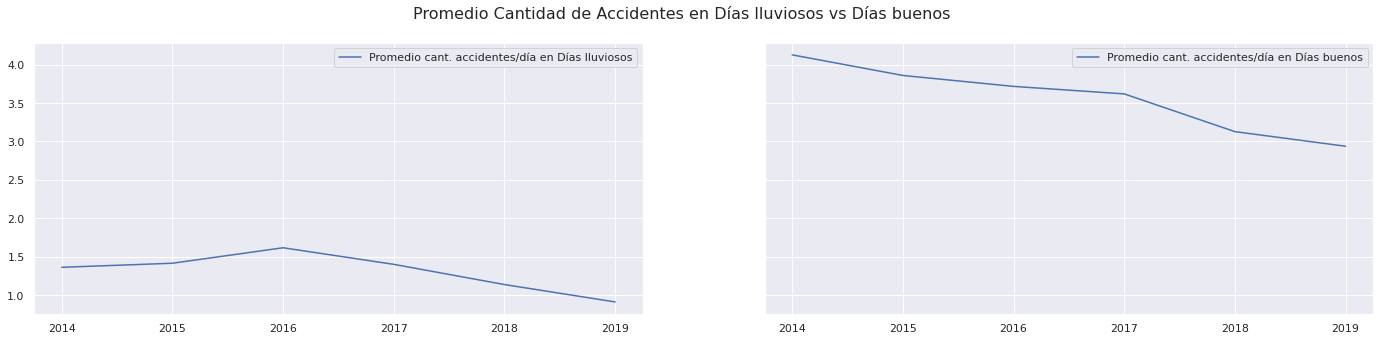

In [351]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 5), sharex=False, sharey=True)
ax[0].plot(df_dias_buenos_lluviosos.index, df_dias_buenos_lluviosos['accidentes_por_dia_lluvia'], label='Promedio cant. accidentes/día en Días lluviosos')
ax[1].plot(df_dias_buenos_lluviosos.index, df_dias_buenos_lluviosos['accidentes_por_dia_buenos'], label='Promedio cant. accidentes/día en Días buenos')
ax[0].legend()
ax[1].legend()
fig.suptitle('Promedio Cantidad de Accidentes en Días lluviosos vs Días buenos', fontsize=16)
fig.show()

Observaciones: 
- El promedio de accidentes en días lluviosos es notablemente inferior a los accidentes en días buenos. Esto puede deberse a que los conductores son más cuidadosos cuando las condiciones de las autopistas no son favorables.

#### Días con mayor cantidad de accidentes

Comenzaremos obteniendo un agrupado de intervenciones por día de la semana

In [352]:
intervenciones_por_dia = df_intervenciones.groupby(df_intervenciones['fecha'].dt.weekday).size() # Monday=0,Sunday=6
days = {0:'Lunes', 1:'Martes', 2:'Miercoles', 3:'Jueves', 4:'Viernes', 5:'Sábado', 6:'Domingo'}
intervenciones_por_dia.index = intervenciones_por_dia.index.map(days)
intervenciones_por_dia.rename_axis('Dia', inplace=True)
intervenciones_por_dia

Dia
Lunes        1022
Martes       1062
Miercoles    1169
Jueves       1153
Viernes      1319
Sábado        926
Domingo       928
dtype: int64

Graficaremos lo anterior

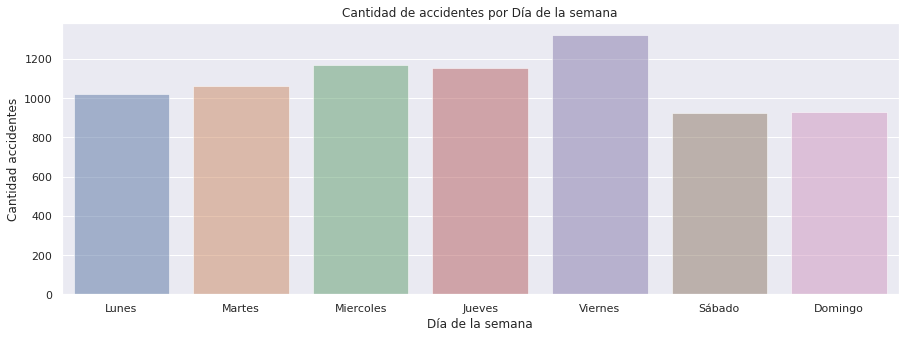

In [353]:
sns.set(rc={'figure.figsize':(15,5)})
barplot = sns.barplot(x=intervenciones_por_dia.index, y=intervenciones_por_dia.values, alpha=0.5)
barplot.set_title('Cantidad de accidentes por Día de la semana')
barplot.set_ylabel('Cantidad accidentes')
barplot.set_xlabel('Día de la semana')
plt.show()

Observaciones:
- El viernes parece ser el día más problemático en cuanto a cantidad de accidentes
- Los fines de semana se registran menos accidentes

#### Horario con mayor cantidad de accidentes

Obtendremos un agrupado de intervenciones por hora del día

In [354]:
intervenciones_por_hora = df_intervenciones.groupby(df_intervenciones['hora']).size() # Monday=0,Sunday=6
intervenciones_por_hora

hora
0     131
1     145
2     149
3     107
4     142
5     172
6     349
7     461
8     459
9     489
10    408
11    359
12    373
13    435
14    461
15    400
16    384
17    467
18    486
19    349
20    269
21    237
22    197
23    150
dtype: int64

Graficaremos lo anterior

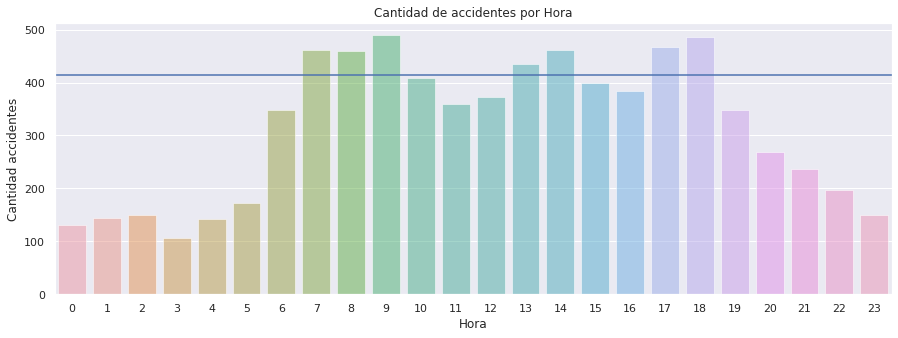

In [355]:
sns.set(rc={'figure.figsize':(15,5)})
barplot = sns.barplot(x=intervenciones_por_hora.index, y=intervenciones_por_hora.values, alpha=0.5)
barplot.set_title('Cantidad de accidentes por Hora')
barplot.set_ylabel('Cantidad accidentes')
barplot.set_xlabel('Hora')
barplot.axhline(415)
plt.show()

Observaciones:
- Las horas entre las que se registran mayor cantidad de accidentes son entre las 7 - 9 hs, 13 - 14 hs y 17 - 18 hs. 
Sin duda estos son los horarios en que más gente se moviliza de su casa al trabajo, y viceversa

#### Meses con mayor cantidad de accidentes

Debido a que sería complejo analizar todos los años en conjunto, ya que la cantidad de accidentes bajan año a año, en su lugar intentaremos encontrar patrones analizando cada año por separado

Comenzaremos obteniendo un agrupado de intervenciones por Año / Mes

In [356]:
df_intervenciones_por_mes = df_intervenciones.groupby([df_intervenciones['fecha'].dt.to_period('Y'),df_intervenciones['fecha'].dt.to_period('M')]).size()
df_intervenciones_por_mes

fecha  fecha  
2014   2014-01     79
       2014-02     82
       2014-03     83
       2014-04     99
       2014-05    114
                 ... 
2022   2022-08      4
       2022-09      1
       2022-10      7
       2022-11      7
       2022-12      4
Length: 108, dtype: int64

Ahora graficaremos la tendencia para cada año por separado

In [357]:
def dibujar_accidentes_por_mes(anio):
  sns.set(rc={"figure.figsize":(15, 5)})
  lineplot = sns.lineplot(x=df_intervenciones_por_mes[anio].index.astype(str), y=df_intervenciones_por_mes[anio].values)
  lineplot.set_xlabel('Meses')
  lineplot.set_ylabel('Cantidad accidentes')
  lineplot.set_title('Accidentes por mes')
  plt.show()

In [358]:
import ipywidgets as widget
anios = df_intervenciones_por_mes.index.get_level_values(0).unique()
widget.interactive(dibujar_accidentes_por_mes, anio=anios)

interactive(children=(Dropdown(description='anio', options=(Period('2014', 'A-DEC'), Period('2015', 'A-DEC'), …

Observaciones:
- 2014: Enero es el mes con menor cantidad de accidentes, Junio y Diciembre son los meses con mayor cantidad.
- 2015: Junio es el mes con menor cantidad de accidentes, Abril el mes con mayor cantidad.
- 2016: Enero es el mes con menor cantidad de accidentes, Julio el mes con mayor cantidad.
- 2017: Enero es el mes con menor cantidad de accidentes, Diciembre el mes con mayor cantidad.
- 2018: Enero es el mes con menor cantidad de accidentes, Junio el mes con mayor cantidad.
- 2019: Enero es el mes con menor cantidad de accidentes, Noviembre el mes con mayor cantidad.
- 2020: De febrero en adelante los accidentes disminuyeron drásticamente. Esto Coincide con la cuarentena obligatoria debido al Covid-19. Sin embargo los accidentes comenzaron a aumentar nuevamente a partir de Septiembre
- 2021: Abril es el mes con menor cantidad de accidentes y Agosto el mes con mayor cantidad.
- 2022: No analizaremos este año ya que solo contamos con datos hasta Marzo

De todo lo anterior podemos concluir que:
- Enero es el mes más tranquilo en cuanto a cantidad de accidentes, esto se puede deber a que mucha gente se encuentra de vacaciones
- Junio y Diciembre parecen ser dos meses problemáticos en cuanto a cantidad de accidentes, sin embargo también deberíamos considerar Abril, Julio y Noviembre

## 2. Tasa de Mortalidad por Accidentes de Tránsito a Nivel Nacional 🚸

### 2.1 Data Acquisition - Lectura desde API 🌐

Utilizaremos la API de [datos.gob.ar](https://datos.gob.ar/dataset/jgm_3/archivo/jgm_3.13), donde se pueden obtener múltiples indicadores (por sus ids de recurso).

No es necesario contar con un clientId ni secret, ya que estos datos son de acceso público.

Documentación API: https://datosgobar.github.io/series-tiempo-ar-api/python-usage/

Se espera obtener una salida similar a:
[https://datos.gob.ar/series/api/series?query](https://datos.gob.ar/series/api/series/?ids=obras_13_01_02,obras_13_01_03,obras_13_01_04,obras_13_01_05,obras_13_01_06,obras_13_01_07,obras_13_01_08,obras_13_01_09,obras_13_01_10,obras_13_01_11,obras_13_01_12,obras_13_01_13,obras_13_01_14,obras_13_01_15,obras_13_01_16,obras_13_01_17,obras_13_01_18,obras_13_01_19,obras_13_01_20,obras_13_01_21,obras_13_01_22,obras_13_01_23,obras_13_01_24&chartType=column)

Comenzaremos armando un diccionario con `{provincia: id recurso}`

In [359]:
dict_provincias = {
    'Buenos Aires':'obras_13_01_02', 
    'CABA': 'obras_13_01_03',
    'Catamarca': 'obras_13_01_04',
    'Chaco': 'obras_13_01_05',
    'Chubut': 'obras_13_01_06',
    'Cordoba': 'obras_13_01_07',
    'Corrientes': 'obras_13_01_08',
    'Entre Rios': 'obras_13_01_09',
    'Formosa': 'obras_13_01_10',
    'Jujuy': 'obras_13_01_11',
    'La Pampa': 'obras_13_01_12',
    'La Rioja': 'obras_13_01_13',
    'Mendoza': 'obras_13_01_14',
    'Misiones': 'obras_13_01_15',
    'Neuquén': 'obras_13_01_16',
    'Rio Negro':'obras_13_01_17',
    'Salta': 'obras_13_01_18',
    'San Juan':'obras_13_01_19',
    'San Luis': 'obras_13_01_20',
    'Santa Cruz': 'obras_13_01_21',
    'Santa Fe': 'obras_13_01_22',
    'Santiago Del Estero': 'obras_13_01_23',
    'Tierra Del Fuego': 'obras_13_01_24',
    'Tucumán': 'obras_13_01_25'
}

Definiremos una función `get_api_call()` que nos será de utilidad a la hora de consultar varios id de recursos a la API

In [360]:
import requests
import urllib.parse

def get_api_call(ids, **kwargs):
    API_BASE_URL = "https://apis.datos.gob.ar/series/api/"
    kwargs["ids"] = ",".join(ids)
    return "{}{}?{}".format(API_BASE_URL, "series", urllib.parse.urlencode(kwargs))

Armamos la url con todos los ids de recursos de las provincias a consultar

(*) Si bien estamos indicando un `start_date='2010-01'` solo se cuenta con registros desde Enero de 2016 a Enero de 2020

In [361]:
api_call = get_api_call(dict_provincias.values(), start_date="2010-01")
print(api_call)

https://apis.datos.gob.ar/series/api/series?start_date=2010-01&ids=obras_13_01_02%2Cobras_13_01_03%2Cobras_13_01_04%2Cobras_13_01_05%2Cobras_13_01_06%2Cobras_13_01_07%2Cobras_13_01_08%2Cobras_13_01_09%2Cobras_13_01_10%2Cobras_13_01_11%2Cobras_13_01_12%2Cobras_13_01_13%2Cobras_13_01_14%2Cobras_13_01_15%2Cobras_13_01_16%2Cobras_13_01_17%2Cobras_13_01_18%2Cobras_13_01_19%2Cobras_13_01_20%2Cobras_13_01_21%2Cobras_13_01_22%2Cobras_13_01_23%2Cobras_13_01_24%2Cobras_13_01_25


Efectuamos la llamada a la API y nos quedamos con el array `'data'` dentro del response

In [362]:
response = requests.get(api_call).json()
response_array = np.array(response['data'])
with np.printoptions(linewidth=300):
    print(response_array)

[['2016-01-01' '0.091' '0.049' '0.23' '0.13' '0.137' '0.136' '0.159' '0.125' '0.185' '0.219' '0.211' '0.185' '0.144' '0.22' '0.148' '0.113' '0.157' '0.142' '0.249' '0.143' '0.143' '0.316' '0.051' '0.21']
 ['2017-01-01' '0.08' '0.049' '0.284' '0.158' '0.109' '0.138' '0.175' '0.119' '0.21' '0.216' '0.209' '0.204' '0.173' '0.21' '0.133' '0.17' '0.148' '0.161' '0.218' '0.136' '0.153' '0.316' '0.062' '0.2']
 ['2018-01-01' '0.078' '0.052' '0.243' '0.163' '0.107' '0.153' '0.173' '0.141' '0.208' '0.195' '0.196' '0.219' '0.134' '0.21' '0.124' '0.146' '0.158' '0.147' '0.214' '0.092' '0.146' '0.286' '0.024' '0.181']
 ['2019-01-01' '0.084' '0.036' '0.17' '0.137' '0.085' '0.099' '0.149' '0.101' '0.147' '0.14' '0.115' '0.173' '0.127' '0.16' '0.128' '0.115' '0.117' '0.132' '0.212' '0.084' '0.144' '0.21' '0.053' '0.193']
 ['2020-01-01' '0.038' '0.026' '0.125' '0.122' '0.034' '0.087' '0.115' '0.051' '0.126' '0.119' '0.1' '0.132' '0.067' '0.115' '0.077' '0.071' '0.096' '0.088' '0.148' '0.038' '0.094' '0

### 2.2 Análisis Exploratorio de datos (EDA) 🔎

El array obtenido desde la API en la sección anterior 👆 es un array bidimensional de 5 filas x 25 columnas.

Una fila por cada año con siguiente formato `[Año | Tasa Provincia 1 | ... | Tasa Provincia N`]

### 2.3 Data Wrangling 🔧

Separaremos el array en index y data para posteriormente poder crear un DataFrame

In [363]:
index = pd.DatetimeIndex(response_array[:, 0]).year.values
data = response_array[:, 1:]
print(index)
print(data)

[2016 2017 2018 2019 2020]
[['0.091' '0.049' '0.23' '0.13' '0.137' '0.136' '0.159' '0.125' '0.185'
  '0.219' '0.211' '0.185' '0.144' '0.22' '0.148' '0.113' '0.157' '0.142'
  '0.249' '0.143' '0.143' '0.316' '0.051' '0.21']
 ['0.08' '0.049' '0.284' '0.158' '0.109' '0.138' '0.175' '0.119' '0.21'
  '0.216' '0.209' '0.204' '0.173' '0.21' '0.133' '0.17' '0.148' '0.161'
  '0.218' '0.136' '0.153' '0.316' '0.062' '0.2']
 ['0.078' '0.052' '0.243' '0.163' '0.107' '0.153' '0.173' '0.141' '0.208'
  '0.195' '0.196' '0.219' '0.134' '0.21' '0.124' '0.146' '0.158' '0.147'
  '0.214' '0.092' '0.146' '0.286' '0.024' '0.181']
 ['0.084' '0.036' '0.17' '0.137' '0.085' '0.099' '0.149' '0.101' '0.147'
  '0.14' '0.115' '0.173' '0.127' '0.16' '0.128' '0.115' '0.117' '0.132'
  '0.212' '0.084' '0.144' '0.21' '0.053' '0.193']
 ['0.038' '0.026' '0.125' '0.122' '0.034' '0.087' '0.115' '0.051' '0.126'
  '0.119' '0.1' '0.132' '0.067' '0.115' '0.077' '0.071' '0.096' '0.088'
  '0.148' '0.038' '0.094' '0.154' '0.052' '0.1

Ahora podemos crear el DataFrame y convertir valores numéricos a porcentajes

In [364]:
df_api = pd.DataFrame(data=data, index=index, columns=dict_provincias.keys())
df_api = df_api.apply(pd.to_numeric)*100
df_api

,Buenos Aires,CABA,Catamarca,Chaco,Chubut,Cordoba,Corrientes,Entre Rios,Formosa,Jujuy,...,Neuquén,Rio Negro,Salta,San Juan,San Luis,Santa Cruz,Santa Fe,Santiago Del Estero,Tierra Del Fuego,Tucumán
2016,9.1,4.9,23.0,13.0,13.7,13.6,15.9,12.5,18.5,21.9,...,14.8,11.3,15.7,14.2,24.9,14.3,14.3,31.6,5.1,21.0
2017,8.0,4.9,28.4,15.8,10.9,13.8,17.5,11.9,21.0,21.6,...,13.3,17.0,14.8,16.1,21.8,13.6,15.3,31.6,6.2,20.0
2018,7.8,5.2,24.3,16.3,10.7,15.3,17.3,14.1,20.8,19.5,...,12.4,14.6,15.8,14.7,21.4,9.2,14.6,28.6,2.4,18.1
2019,8.4,3.6,17.0,13.7,8.5,9.9,14.9,10.1,14.7,14.0,...,12.8,11.5,11.7,13.2,21.2,8.4,14.4,21.0,5.3,19.3
2020,3.8,2.6,12.5,12.2,3.4,8.7,11.5,5.1,12.6,11.9,...,7.7,7.1,9.6,8.8,14.8,3.8,9.4,15.4,5.2,13.3


Con la información mucho más organizada ya podemos proceder a realizar algunas visualizaciones 😉

### 2.4 Visualizaciones 📊

#### 2.4.1 Tasa de Mortalidad por Provincias de acuerdo al paso de los Años

In [365]:
import matplotlib.colors as mcolors  
def drawSubplotBar(subplot, title, x, y):
  subplot.bar(x, y, color=mcolors.XKCD_COLORS, alpha=0.7)
  subplot.set_xticklabels(x, rotation=30, fontsize=10)
  subplot.set_title(title, loc='left', va='top', fontsize=15)
  subplot.set_ylabel('%')
  for index,data in enumerate(y):
    subplot.text(x=index , y =data+1 , s=f"{round(data,1)}" , fontdict=dict(fontsize=8))

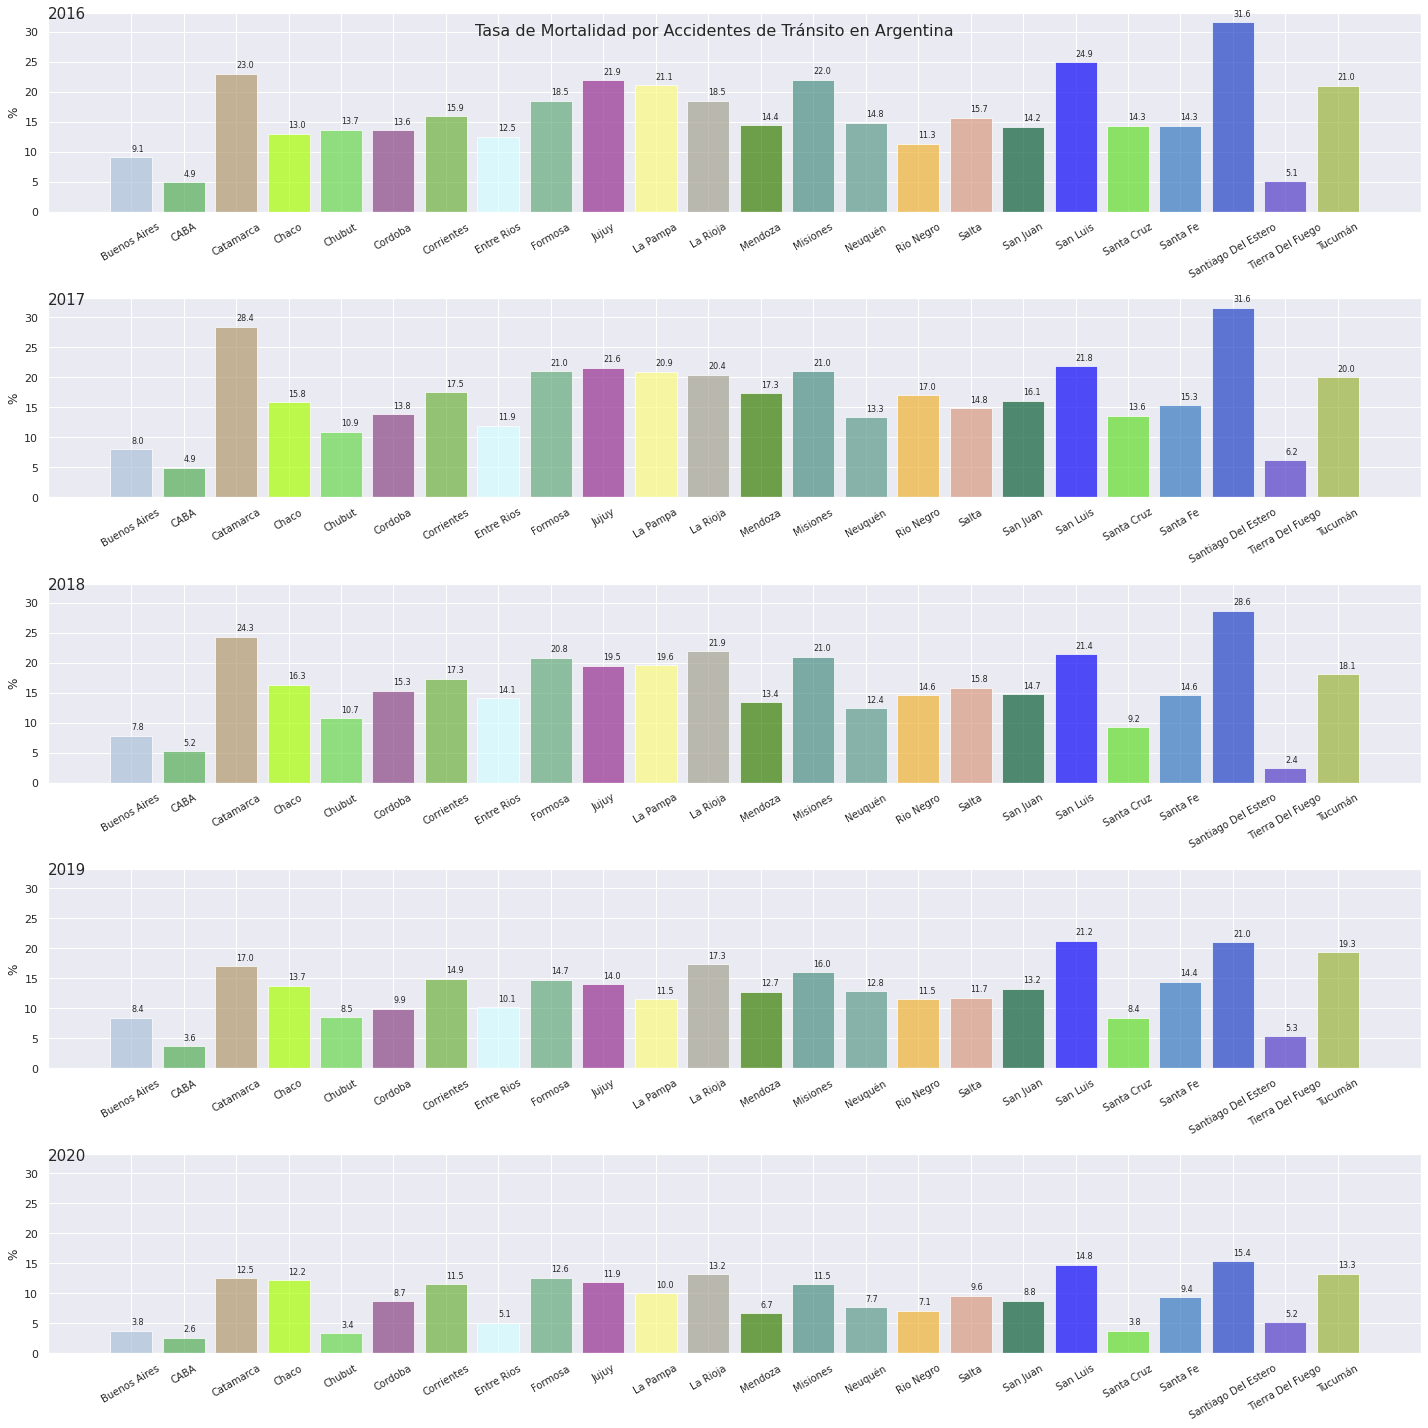

In [366]:
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(20, 20), sharex=False, sharey=True)
fig.suptitle('Tasa de Mortalidad por Accidentes de Tránsito en Argentina', fontsize=16)
drawSubplotBar(ax[0], '2016', df_api.columns, df_api.values[0])
drawSubplotBar(ax[1], '2017', df_api.columns, df_api.values[1])
drawSubplotBar(ax[2], '2018', df_api.columns, df_api.values[2])
drawSubplotBar(ax[3], '2019', df_api.columns, df_api.values[3])
drawSubplotBar(ax[4], '2020', df_api.columns, df_api.values[4])
fig.tight_layout()
fig.show()

Observaciones: 
- Afortunademente a nivel nacional se observa una baja con respecto a la tasa de mortalidad por accidentes de tránsito.
- CABA presenta los índices más bajos en 2016, 2017, 2019 y 2020. En 2018 Tierra del Fuego tuvo el índice más bajo.
- Santiago del Estero es la provincia que presenta índices más altos, sin embargo desde 2016 hasta 2020 redujo su tasa a más de la mitad (31,6% -> 15,4%).

#### 2.4.2 Heatmap

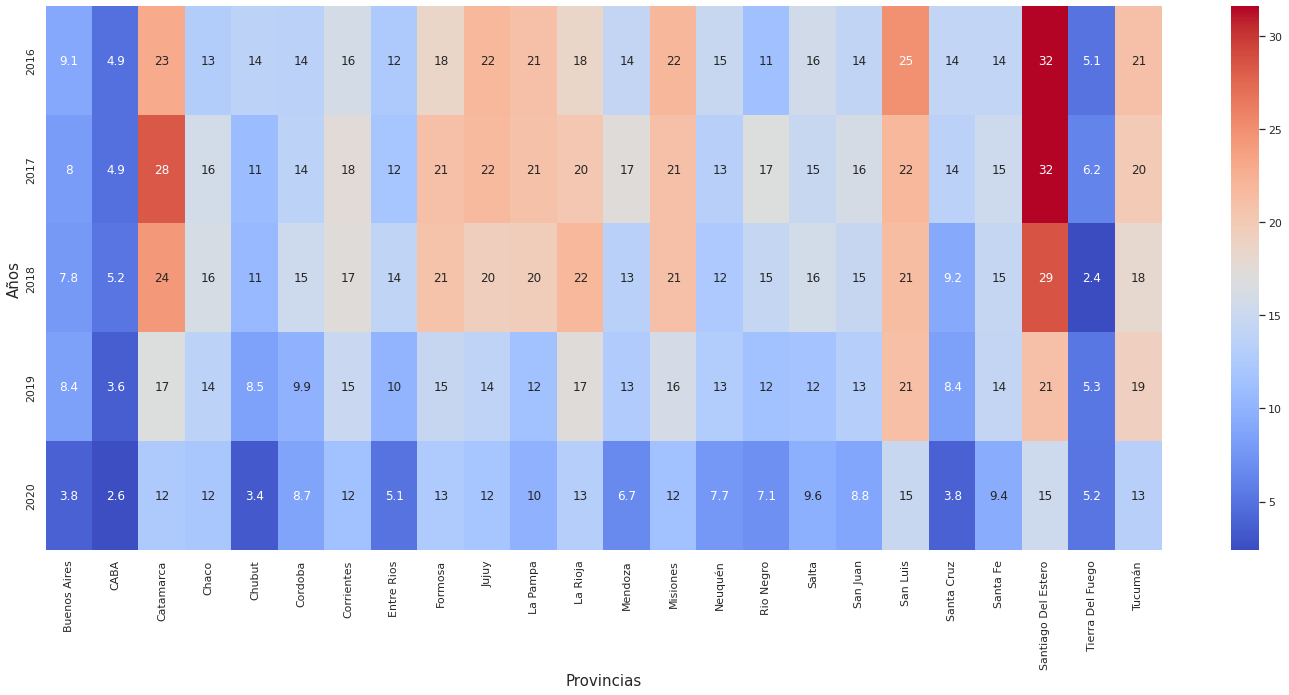

In [367]:
plt.figure(figsize=(25, 10))
sns.set(font_scale=1)
sns.heatmap(df_api,
            cmap='coolwarm',
            annot=True,
            vmax = df_api.values.max())

plt.xlabel('Provincias',fontsize=15)
plt.ylabel('Años',fontsize=15)
plt.show()

Observaciones:
- A simple vista se visualiza que las provincias más comprometidas en cuanto a tasa de mortalidad hacia el 2016 fueron Catamarca y Santiago del Estero.
- Afortunadamente desde el 2019 esos valores bajaron notablemente.

#### 2.4.3 Promedio Tasa de Mortalidad a Nivel Nacional

Corroboraremos mediante un breve análisis algo que se viene apreciando en los gráficos anteriores. 

¿Cómo se viene comportando en promedio la Tasa de Mortalidad a Nivel Nacional?

Para ello crearemos una nueva columna con el promedio por año 👇

In [368]:
df_api['Promedio'] = df_api.mean(axis=1)
df_api

,Buenos Aires,CABA,Catamarca,Chaco,Chubut,Cordoba,Corrientes,Entre Rios,Formosa,Jujuy,...,Rio Negro,Salta,San Juan,San Luis,Santa Cruz,Santa Fe,Santiago Del Estero,Tierra Del Fuego,Tucumán,Promedio
2016,9.1,4.9,23.0,13.0,13.7,13.6,15.9,12.5,18.5,21.9,...,11.3,15.7,14.2,24.9,14.3,14.3,31.6,5.1,21.0,16.220833
2017,8.0,4.9,28.4,15.8,10.9,13.8,17.5,11.9,21.0,21.6,...,17.0,14.8,16.1,21.8,13.6,15.3,31.6,6.2,20.0,16.795833
2018,7.8,5.2,24.3,16.3,10.7,15.3,17.3,14.1,20.8,19.5,...,14.6,15.8,14.7,21.4,9.2,14.6,28.6,2.4,18.1,15.791667
2019,8.4,3.6,17.0,13.7,8.5,9.9,14.9,10.1,14.7,14.0,...,11.5,11.7,13.2,21.2,8.4,14.4,21.0,5.3,19.3,12.962500
2020,3.8,2.6,12.5,12.2,3.4,8.7,11.5,5.1,12.6,11.9,...,7.1,9.6,8.8,14.8,3.8,9.4,15.4,5.2,13.3,9.200000


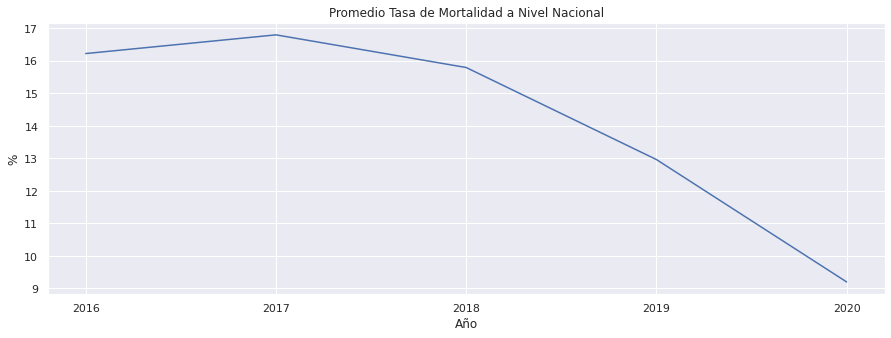

In [369]:
sns.set(rc={"figure.figsize":(15, 5)})
lineplot = sns.lineplot(x=df_api.index.astype(str), y=df_api['Promedio'])
lineplot.set_xlabel('Año')                  
lineplot.set_ylabel('%')
lineplot.set_title('Promedio Tasa de Mortalidad a Nivel Nacional')
plt.show()

Observaciones:
- La tasa de mortalidad viene bajando considerablemente desde 2017 (como ya se venía anticipando)
- El promedio registrado en 2020 no se puede tomar como cierto ya que solo se registran datos hasta Enero de 2020, por lo que el último real es el del 2019

## Predicción Cantidad de Accidentes por mes 📉

Intentaremos predecir la cantidad de accidentes por mes utilizando Regresión Lineal Simple

### Regresión Lineal Simple

#### Preparación del dataset

Continuaremos trabajando con el dataset de intervenciones por mes, pero excluiremos desde marzo 2022 en adelante por encontrarse incompleto

In [370]:
df_intervenciones_por_mes = df_intervenciones_por_mes[df_intervenciones_por_mes.index.get_level_values(1)<='2022-03']
df_intervenciones_por_mes

fecha  fecha  
2014   2014-01     79
       2014-02     82
       2014-03     83
       2014-04     99
       2014-05    114
                 ... 
2021   2021-11     36
       2021-12     57
2022   2022-01     37
       2022-02     37
       2022-03     62
Length: 99, dtype: int64

In [371]:
df_intervenciones_por_mes_pred = pd.DataFrame()
df_intervenciones_por_mes_pred['Mes']=df_intervenciones_por_mes.index.get_level_values(1).astype(str)
df_intervenciones_por_mes_pred['CantAccidentes']=df_intervenciones_por_mes.values
df_intervenciones_por_mes_pred

,Mes,CantAccidentes
0,2014-01,79
1,2014-02,82
2,2014-03,83
3,2014-04,99
4,2014-05,114
...,...,...
94,2021-11,36
95,2021-12,57
96,2022-01,37
97,2022-02,37


#### Variables dependiente e independiente

In [372]:
X = df_intervenciones_por_mes_pred.index.values
y = df_intervenciones_por_mes_pred['CantAccidentes']

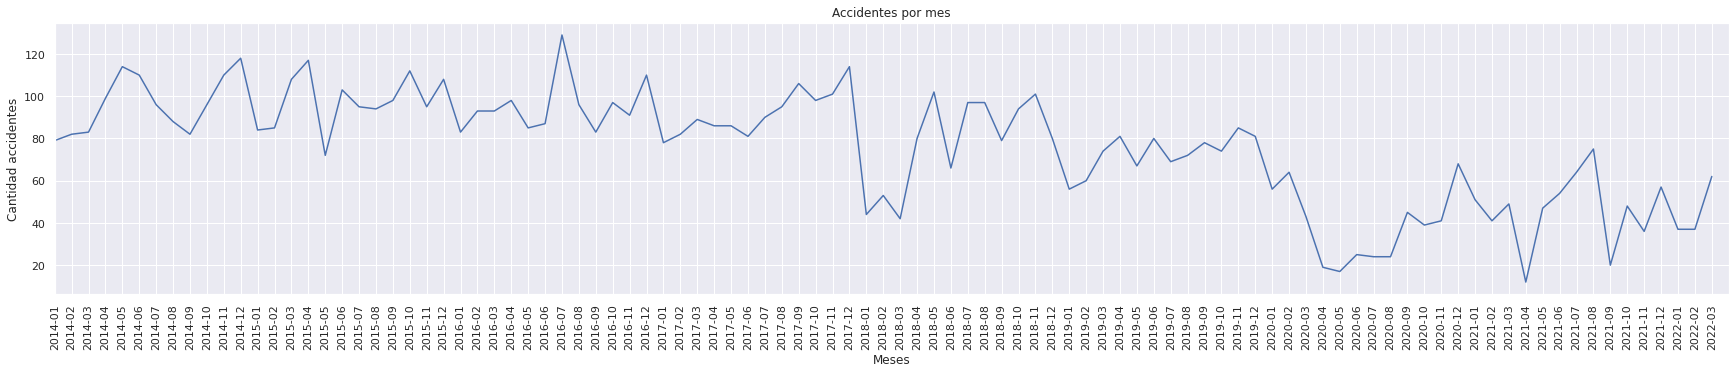

In [373]:
sns.set(rc={"figure.figsize":(30, 5)})
lineplot = sns.lineplot(x=X, y=y)
lineplot.set_xlabel('Meses')
lineplot.set_ylabel('Cantidad accidentes')
lineplot.set_title('Accidentes por mes')
lineplot.set_xticks(range(len(df_intervenciones_por_mes_pred['Mes'])))
lineplot.set_xticklabels(df_intervenciones_por_mes_pred['Mes'], rotation=90)
lineplot.set_xlim(0,len(df_intervenciones_por_mes_pred['Mes']))
plt.show()

#### Conjunto de Training y Testing

In [374]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

#### Instanciar el modelo

In [375]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#### Entrenar el modelo

In [376]:
model.fit(pd.DataFrame(X_train), y_train)

LinearRegression()

#### Agregar predicción al dataframe

In [377]:
df_intervenciones_por_mes_pred['CantAccidentesPred'] = model.predict(pd.DataFrame(X))
df_intervenciones_por_mes_pred

,Mes,CantAccidentes,CantAccidentesPred
0,2014-01,79,110.104113
1,2014-02,82,109.426437
2,2014-03,83,108.748762
3,2014-04,99,108.071087
4,2014-05,114,107.393411
...,...,...,...
94,2021-11,36,46.402620
95,2021-12,57,45.724945
96,2022-01,37,45.047269
97,2022-02,37,44.369594


#### Cantidad de Accidentes real vs Cantidad de Accidentes predecidos 📉

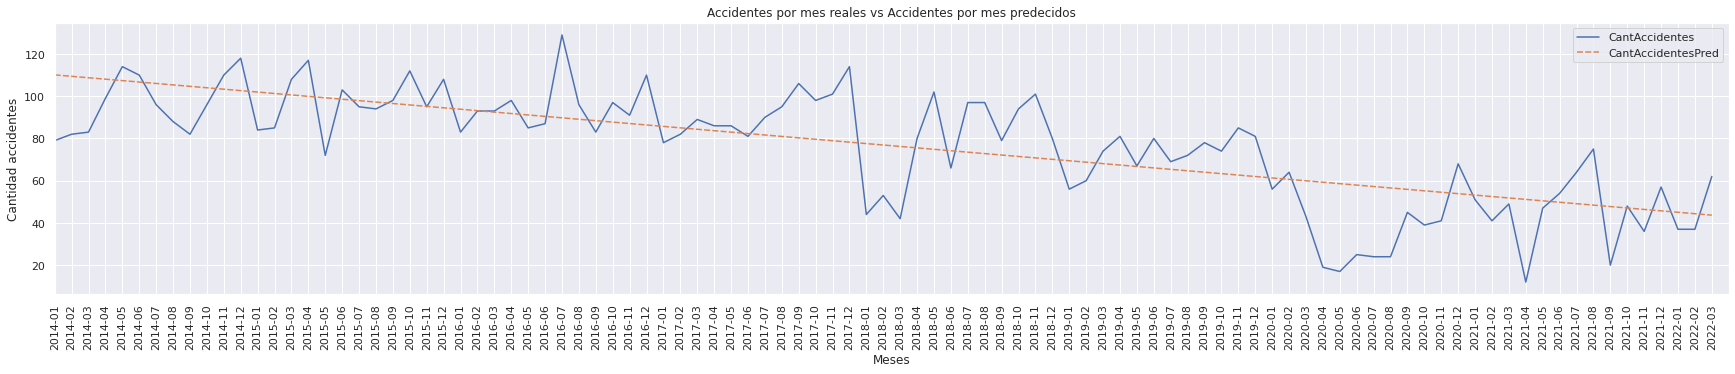

In [378]:
sns.set(rc={"figure.figsize":(30, 5)})
lineplot = sns.lineplot(data=df_intervenciones_por_mes_pred[['CantAccidentes','CantAccidentesPred']])
lineplot.set_xlabel('Meses')
lineplot.set_ylabel('Cantidad accidentes')
lineplot.set_title('Accidentes por mes reales vs Accidentes por mes predecidos')
lineplot.set_xticks(range(len(df_intervenciones_por_mes_pred['Mes'])))
lineplot.set_xticklabels(df_intervenciones_por_mes_pred['Mes'], rotation=90)
lineplot.set_xlim(0,len(df_intervenciones_por_mes_pred['Mes']))
plt.show()

#### Evaluación del modelo

##### R2

In [379]:
from sklearn.metrics import r2_score, mean_absolute_error, median_absolute_error
r2_score(df_intervenciones_por_mes_pred['CantAccidentes'], df_intervenciones_por_mes_pred['CantAccidentesPred'])

0.5411650429177324

El mejor puntaje posible es de 1.0

##### Mean Absolute Error

In [380]:
mean_absolute_error(df_intervenciones_por_mes_pred['CantAccidentes'], df_intervenciones_por_mes_pred['CantAccidentesPred'])

14.186048299204531

El mejor puntaje posible es 0.0

##### Median Absolute Error

In [381]:
median_absolute_error(df_intervenciones_por_mes_pred['CantAccidentes'], df_intervenciones_por_mes_pred['CantAccidentesPred'])

10.890076585599772

El mejor puntaje posible es 0.0

## Predicción Cantidad de Accidentes por mes por autopista 📉

### Regresión Lineal Simple

#### Preparación del dataset

Intentaremos predecir la Cantidad de Accidentes agregando la variable `autopista` al análisis para ver si obtenemos mejor resultados

In [460]:
df_intervenciones_por_mes_autopista = df_intervenciones.groupby(
    [df_intervenciones['fecha'].dt.month_name(), 
    'autopista', 
    ]).size().reset_index()

df_intervenciones_por_mes_autopista.rename({'fecha':'Mes', 'autopista': 'Autopista', 0:'CantAccidentes'}, inplace=True, axis=1)
df_intervenciones_por_mes_autopista['Mes']=df_intervenciones_por_mes_autopista['Mes'].astype(str)

df_intervenciones_por_mes_autopista

,Mes,Autopista,CantAccidentes
0,April,AU 25 DE MAYO,182
1,April,AU CAMPORA,7
2,April,AU DELLEPIANE,101
3,April,AU FRONDIZI,65
4,April,AU ILLIA,27
...,...,...,...
156,September,DIST. 9 DE JULIO,3
157,September,PASEO DEL BAJO,4
158,September,PTE. SCALABRINI ORTIZ,2
159,September,TRANSICION RAMAL 1,1


In [461]:
df_intervenciones_por_mes_autopista_dummies = pd.get_dummies(df_intervenciones_por_mes_autopista)
df_intervenciones_por_mes_autopista_dummies

,CantAccidentes,Mes_April,Mes_August,Mes_December,Mes_February,Mes_January,Mes_July,Mes_June,Mes_March,Mes_May,...,Autopista_AV LUGONES,Autopista_DIST. 9 DE JULIO,Autopista_DIST. DELLEPIANE,Autopista_DIST. UDAONDO,Autopista_PASEO DEL BAJO,Autopista_PTE. SCALABRINI ORTIZ,Autopista_TRANSICION RAMAL 1,Autopista_TRANSICION RAMAL 2,Autopista_TRANSICION RAMAL 3,Autopista_TRANSICION RAMAL 4
0,182,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,101,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,65,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,27,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,3,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
157,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
158,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
159,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


#### Variables dependiente e independientes

In [462]:
X = df_intervenciones_por_mes_autopista_dummies.drop('CantAccidentes', axis=1)
y = df_intervenciones_por_mes_autopista_dummies['CantAccidentes']

#### Conjunto de Training y Testing

In [463]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#### Instanciar el modelo

In [464]:
model = LinearRegression()

#### Entrenar el modelo

In [465]:
model.fit(X_train, y_train)

LinearRegression()

#### Agregar predicción al dataframe

In [466]:
df_intervenciones_por_mes_autopista['CantAccidentesPred'] = model.predict(X)
df_intervenciones_por_mes_autopista['Sesgo']=df_intervenciones_por_mes_autopista['CantAccidentes'] - df_intervenciones_por_mes_autopista['CantAccidentesPred']
df_intervenciones_por_mes_autopista['ErrorPorc']=((df_intervenciones_por_mes_autopista['CantAccidentes'] - df_intervenciones_por_mes_autopista['CantAccidentesPred'])/df_intervenciones_por_mes_autopista['CantAccidentes']) *100
df_intervenciones_por_mes_autopista

,Mes,Autopista,CantAccidentes,CantAccidentesPred,Sesgo,ErrorPorc
0,April,AU 25 DE MAYO,182,189.87500,-7.87500,-4.326923
1,April,AU CAMPORA,7,2.28125,4.71875,67.410714
2,April,AU DELLEPIANE,101,102.71875,-1.71875,-1.701733
3,April,AU FRONDIZI,65,57.34375,7.65625,11.778846
4,April,AU ILLIA,27,31.12500,-4.12500,-15.277778
...,...,...,...,...,...,...
156,September,DIST. 9 DE JULIO,3,0.09375,2.90625,96.875000
157,September,PASEO DEL BAJO,4,-1.37500,5.37500,134.375000
158,September,PTE. SCALABRINI ORTIZ,2,-0.25000,2.25000,112.500000
159,September,TRANSICION RAMAL 1,1,-8.90625,9.90625,990.625000


#### Evaluación del modelo

##### R2

In [494]:
r2_score(df_intervenciones_por_mes_autopista['CantAccidentes'], df_intervenciones_por_mes_autopista['CantAccidentesPred'])

0.97969851043544

Obtenemos una R2 score muy cercano al 1

##### Mean Absolute Error

In [495]:
mean_absolute_error(df_intervenciones_por_mes_autopista['CantAccidentes'], df_intervenciones_por_mes_autopista['CantAccidentesPred'])

5.918672360248447

Obtenemos un Mean Absolute Error mucho más bajo (mientras más cercano al 0 mejor)

##### Median Absolute Error

In [496]:
median_absolute_error(df_intervenciones_por_mes_autopista['CantAccidentes'], df_intervenciones_por_mes_autopista['CantAccidentesPred'])

4.125

Obtenemos un Median Absolute Error mucho más bajo (mientras más cercano al 0 mejor)